# Proyek 1 Predictive Analytics :
- **Nama:** Muhammad Rakha Almasah
- **Email:** muh.rakha.al@gmail.com
- **ID Dicoding:** muhrakhaal

# Gathering Data

1. **Instalasi dan Impor Library**  
   - Instalasi library `yfinance` untuk mengunduh data keuangan.  
   - Mengimpor library seperti `yfinance`, `numpy`, `matplotlib`, `pandas`, dan `seaborn` untuk pengolahan data dan visualisasi.

2. **Mendefinisikan Fungsi Unduh Data**  
   - Fungsi `download_data_close_only` digunakan untuk mengunduh data harga penutupan (*Close Price*) berdasarkan simbol ticker dan rentang waktu tertentu, lalu menyimpannya sebagai file CSV.

3. **Menentukan Rentang Waktu**  
   - Rentang waktu data yang akan diambil ditetapkan mulai dari `2001-01-01` hingga `2024-12-01`.

4. **Mengunduh Data Target (Variabel Y)**  
   - Data indeks NASDAQ Composite (`^IXIC`) dan ETF S&P 500 (`SPY`) diunduh sebagai target (*dependent variable*).

5. **Mengunduh Data Prediktor (Variabel X)**  
   - Data harga penutupan dari beberapa perusahaan besar diunduh sebagai prediktor (*independent variables*):  
     - `AAPL` (Apple)  
     - `MSFT` (Microsoft)  
     - `AMZN` (Amazon)  
     - `BRK-B` (Berkshire Hathaway)  

6. **Membaca Dataset dari CSV**  
   - File CSV yang telah diunduh dibaca menggunakan `pandas` ke dalam DataFrame untuk diproses lebih lanjut.

7. **Verifikasi Data**  
   - Menampilkan beberapa baris pertama dari setiap dataset untuk memastikan data berhasil diunduh dan sesuai dengan kebutuhan.

8. **Fokus pada Data Harga Penutupan**  
   - Hanya kolom *Close Price* yang diekstraksi dan digunakan dalam analisis lebih lanjut.

Tahap ini bertujuan untuk mengumpulkan data keuangan yang relevan secara terstruktur, yang akan digunakan untuk proses analisis selanjutnya.


In [1]:
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 77.8 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [3]:
def download_data_close_only(ticker_symbol, start_date, end_date, filename):
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date, auto_adjust=False)
    data = data[['Close']]
    data.reset_index(inplace=True)
    data['Date'] = data['Date'].dt.date
    data.to_csv(filename, index=False)
    print(f"Data (Close only) {ticker_symbol} berhasil disimpan ke {filename}")

start_date = '2001-01-01'
end_date = '2024-12-01'

# Variabel Y (Target)
download_data_close_only('^IXIC', start_date, end_date, 'data_nasdaq_close.csv')  # NASDAQ Composite
download_data_close_only('SPY', start_date, end_date, 'data_spy_close.csv')  # S&P 500 ETF

# Variabel X (Predictors)
download_data_close_only('AAPL', start_date, end_date, 'data_aapl_close.csv')  # Apple
download_data_close_only('MSFT', start_date, end_date, 'data_msft_close.csv')  # Microsoft
download_data_close_only('AMZN', start_date, end_date, 'data_amzn_close.csv')  # Amazon
download_data_close_only('BRK-B', start_date, end_date, 'data_brkb_close.csv')  # Berkshire Hathaway

Data (Close only) ^IXIC berhasil disimpan ke data_nasdaq_close.csv
Data (Close only) SPY berhasil disimpan ke data_spy_close.csv


<ipython-input-3-846dc20561f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].dt.date


Data (Close only) AAPL berhasil disimpan ke data_aapl_close.csv
Data (Close only) MSFT berhasil disimpan ke data_msft_close.csv
Data (Close only) AMZN berhasil disimpan ke data_amzn_close.csv
Data (Close only) BRK-B berhasil disimpan ke data_brkb_close.csv


In [5]:
nasdaq_df = pd.read_csv('data_nasdaq_close.csv')  # NASDAQ Composite
spy_df = pd.read_csv('data_spy_close.csv')  # S&P 500 ETF
aapl_df = pd.read_csv('data_aapl_close.csv')  # Apple
msft_df = pd.read_csv('data_msft_close.csv')  # Microsoft
amzn_df = pd.read_csv('data_amzn_close.csv')  # Amazon
brkb_df = pd.read_csv('data_brkb_close.csv')  # Berkshire Hathaway

In [6]:
print("=== Data NASDAQ Composite ===")
print(nasdaq_df.head())

print("\n=== Data S&P 500 ETF (SPY) ===")
print(spy_df.head())

print("\n=== Data Apple (AAPL) ===")
print(aapl_df.head())

print("\n=== Data Microsoft (MSFT) ===")
print(msft_df.head())

print("\n=== Data Amazon (AMZN) ===")
print(amzn_df.head())

print("\n=== Data Berkshire Hathaway (BRK-B) ===")
print(brkb_df.head())

=== Data NASDAQ Composite ===
         Date        Close
0  2001-01-02  2291.860107
1  2001-01-03  2616.689941
2  2001-01-04  2566.830078
3  2001-01-05  2407.649902
4  2001-01-08  2395.919922

=== Data S&P 500 ETF (SPY) ===
         Date       Close
0  2001-01-02  128.812500
1  2001-01-03  135.000000
2  2001-01-04  133.546875
3  2001-01-05  129.187500
4  2001-01-08  130.187500

=== Data Apple (AAPL) ===
         Date     Close
0  2001-01-02  0.265625
1  2001-01-03  0.292411
2  2001-01-04  0.304688
3  2001-01-05  0.292411
4  2001-01-08  0.295759

=== Data Microsoft (MSFT) ===
         Date     Close
0  2001-01-02  21.68750
1  2001-01-03  23.96875
2  2001-01-04  24.21875
3  2001-01-05  24.56250
4  2001-01-08  24.46875

=== Data Amazon (AMZN) ===
         Date     Close
0  2001-01-02  0.693750
1  2001-01-03  0.878125
2  2001-01-04  0.775000
3  2001-01-05  0.728125
4  2001-01-08  0.746875

=== Data Berkshire Hathaway (BRK-B) ===
         Date      Close
0  2001-01-02  48.220001
1  2001-01-

# Assessing and Cleaning Data (Exploratory Data Analysis - Deskripsi Variabel dan Missing Value)

1. **Penilaian Dataset**  
   - Memuat dataset dari file CSV dan menampilkan informasi struktur data, seperti jumlah kolom, tipe data, dan jumlah entri.  
   - Menghitung jumlah nilai yang hilang (*missing values*) di setiap kolom.  
   - Mengidentifikasi jumlah baris duplikat di dataset.

2. **Analisis Statistik Deskriptif**  
   - Menampilkan statistik deskriptif (seperti rata-rata, median, nilai minimum, maksimum, dan standar deviasi) untuk memahami distribusi data.

3. **Visualisasi untuk Deteksi Outliers**  
   - Menggunakan *boxplot* untuk mendeteksi nilai-nilai ekstrem (*outliers*) pada data harga penutupan (*Close Price*).

4. **Identifikasi Outliers dengan Metode IQR**  
   - Menghitung batas bawah dan batas atas menggunakan *Interquartile Range (IQR)* untuk mengidentifikasi nilai yang dianggap sebagai outliers.  
   - Batas bawah: \( Q1 - 1.5 \ times IQR \)  
   - Batas atas: \( Q3 + 1.5 \ times IQR \)

5. **Menghapus Outliers**  
   - Menyaring data untuk menghapus baris dengan nilai di luar batas yang telah ditentukan.  
   - Menyimpan dataset yang telah dibersihkan ke file CSV baru.

6. **Memastikan Kolom 'Date' dalam Format Tanggal**  
   - Semua kolom tanggal diubah ke format datetime untuk memastikan konsistensi data waktu.

7. **Penggabungan Dataset**  
   - Menggabungkan semua dataset berdasarkan kolom 'Date' dengan metode *inner join* untuk memastikan data yang tersinkronisasi.  
   - Mengganti nama kolom untuk memberikan kejelasan pada variabel data yang digabungkan.

8. **Menyimpan Dataset Gabungan**  
   - Dataset hasil penggabungan disimpan ke file CSV baru untuk analisis lanjutan.

9. **Statistik Deskriptif Dataset Gabungan**  
   - Menampilkan statistik deskriptif dari dataset yang telah digabungkan untuk memastikan konsistensi dan kualitas data.

Tahap ini diibaratkan seperti menyiapkan bahan baku untuk memasak. Data yang "kotor" dibersihkan, bahan-bahan yang tidak diperlukan (outliers) disisihkan, dan semua elemen digabungkan untuk memastikan masakan (analisis) berikutnya memiliki dasar yang berkualitas.


In [7]:
def assess_and_remove_outliers(file_path, output_file):
    df = pd.read_csv(file_path)

    print(f"\n=== Penilaian Dataset: {file_path} ===")
    print("=== Informasi Dataset ===")
    df.info()

    print("\n=== Jumlah Missing Values ===")
    print(df.isna().sum())

    print("\nJumlah Duplikasi: ", df.duplicated().sum())

    print("\n=== Statistik Deskriptif ===")
    print(df.describe())

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Close'])
    plt.title(f"Boxplot {file_path.split('.')[0]}")
    plt.xlabel("Close")
    plt.show()

    Q1 = df['Close'].quantile(0.25)
    Q3 = df['Close'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Batas bawah: {lower_bound}")
    print(f"Batas atas: {upper_bound}")

    df_no_outliers = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]

    print("\nUkuran dataset sebelum menghapus outliers:", df.shape)
    print("Ukuran dataset setelah menghapus outliers:", df_no_outliers.shape)

    df_no_outliers.to_csv(output_file, index=False)
    print(f"\nDataset tanpa outliers berhasil disimpan ke '{output_file}'")


=== Penilaian Dataset: data_nasdaq_close.csv ===
=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6016 non-null   object 
 1   Close   6016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.1+ KB

=== Jumlah Missing Values ===
Date     0
Close    0
dtype: int64

Jumlah Duplikasi:  0

=== Statistik Deskriptif ===
              Close
count   6016.000000
mean    5476.772602
std     4490.949257
min     1114.109985
25%     2169.059937
50%     3117.635010
75%     7609.400024
max    19298.759766


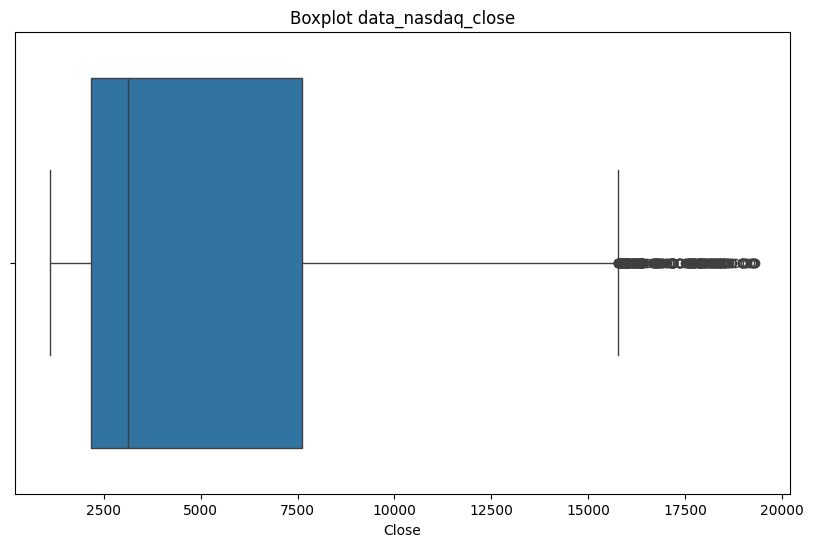

Batas bawah: -5991.4501953125
Batas atas: 15769.91015625

Ukuran dataset sebelum menghapus outliers: (6016, 2)
Ukuran dataset setelah menghapus outliers: (5804, 2)

Dataset tanpa outliers berhasil disimpan ke 'data_nasdaq_no_outliers.csv'

=== Penilaian Dataset: data_spy_close.csv ===
=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6016 non-null   object 
 1   Close   6016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.1+ KB

=== Jumlah Missing Values ===
Date     0
Close    0
dtype: int64

Jumlah Duplikasi:  0

=== Statistik Deskriptif ===
             Close
count  6016.000000
mean    212.594627
std     123.728590
min      68.110001
25%     119.290001
50%     152.215004
75%     278.692497
max     602.549988


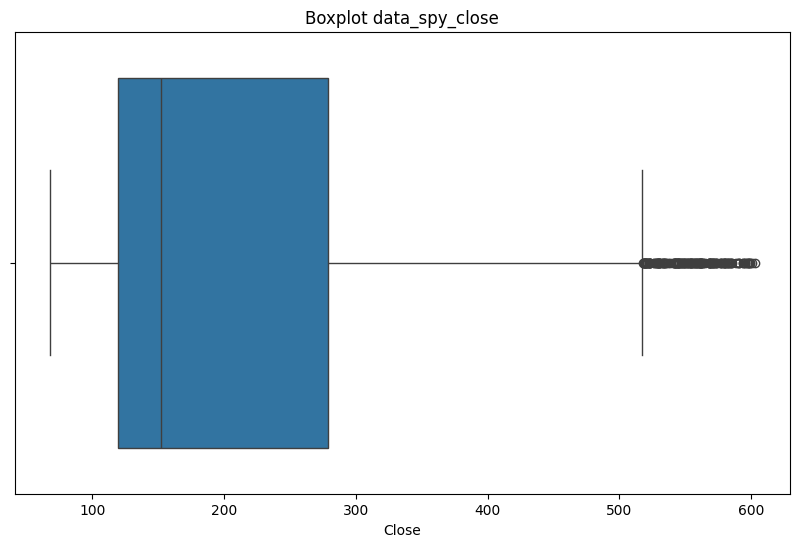

Batas bawah: -119.8137435913086
Batas atas: 517.7962417602539

Ukuran dataset sebelum menghapus outliers: (6016, 2)
Ukuran dataset setelah menghapus outliers: (5861, 2)

Dataset tanpa outliers berhasil disimpan ke 'data_spy_no_outliers.csv'


In [8]:
assess_and_remove_outliers('data_nasdaq_close.csv', 'data_nasdaq_no_outliers.csv')  # NASDAQ Composite
assess_and_remove_outliers('data_spy_close.csv', 'data_spy_no_outliers.csv')  # S&P 500 ETF

**Insight dari Hasil Analisis dan Visualisasi Data untuk Variabel Y**

1. **Struktur dan Konsistensi Data**  
   - Dataset `data_nasdaq_close.csv` dan `data_spy_close.csv` memiliki **6016 baris** dengan **dua kolom utama** (`Date` dan `Close`), tanpa nilai yang hilang (*missing values*) maupun duplikasi.
   - Format kolom `Close` adalah numerik (*float64*), sedangkan kolom `Date` masih berupa tipe objek yang perlu dikonversi ke datetime.

2. **Statistik Deskriptif**  
   - **NASDAQ Composite (`data_nasdaq_close.csv`):**  
     - Rata-rata harga penutupan adalah **5,476.77**, dengan standar deviasi yang besar (**4,490.95**) menunjukkan fluktuasi harga yang signifikan.  
     - Harga minimum adalah **1,114.10**, sedangkan maksimum adalah **19,298.76**.  
     - Sebagian besar harga berada dalam rentang **2,169.06** hingga **7,609.40** (*IQR*).  
   - **S&P 500 ETF (`data_spy_close.csv`):**  
     - Rata-rata harga penutupan adalah **212.59**, dengan standar deviasi sebesar **123.72**, menunjukkan tingkat variabilitas yang cukup tinggi.  
     - Harga minimum adalah **68.11**, sedangkan maksimum adalah **602.55**.  
     - Sebagian besar harga berada dalam rentang **119.29** hingga **278.69** (*IQR*).  

3. **Deteksi Outliers**  
   - Menggunakan metode *Interquartile Range (IQR)* untuk menentukan batas bawah dan atas:  
     - **NASDAQ Composite:**  
       - Batas bawah: **-5,991.45** (tidak relevan karena semua nilai positif).  
       - Batas atas: **15,769.91**.  
       - Data outliers terdeteksi di atas batas atas, mengindikasikan nilai harga yang ekstrem pada data.  
     - **S&P 500 ETF:**  
       - Batas bawah: **-119.81** (tidak relevan karena semua nilai positif).  
       - Batas atas: **517.79**.  
       - Data outliers terdeteksi di atas batas atas.

4. **Ukuran Dataset Setelah Menghapus Outliers**  
   - **NASDAQ Composite:**  
     - Dataset awal memiliki **6016 baris**, berkurang menjadi **5804 baris** setelah outliers dihapus.  
     - Sebanyak **212 baris** dihapus sebagai outliers.  
   - **S&P 500 ETF:**  
     - Dataset awal memiliki **6016 baris**, berkurang menjadi **5861 baris** setelah outliers dihapus.  
     - Sebanyak **155 baris** dihapus sebagai outliers.  

5. **Visualisasi Data dengan Boxplot**  
   - **Boxplot NASDAQ:**  
     - Distribusi harga menunjukkan banyak data outliers di bagian atas (*upper whisker*), mengindikasikan volatilitas harga di pasar NASDAQ pada periode tertentu.  
   - **Boxplot S&P 500 ETF:**  
     - Outliers juga terdeteksi pada bagian atas distribusi, meskipun lebih sedikit dibandingkan NASDAQ.

Kesimpulan
- Kedua dataset menunjukkan adanya fluktuasi harga yang besar, terutama pada data NASDAQ Composite, yang mencerminkan volatilitas pasar saham teknologi selama periode yang dianalisis.
- Outliers berhasil diidentifikasi dan dihapus untuk meningkatkan kualitas data dan memastikan hasil analisis selanjutnya lebih akurat.
- Selanjutnya, data yang telah dibersihkan siap digunakan untuk analisis prediktif atau model lainnya.



=== Penilaian Dataset: data_aapl_close.csv ===
=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6016 non-null   object 
 1   Close   6016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.1+ KB

=== Jumlah Missing Values ===
Date     0
Close    0
dtype: int64

Jumlah Duplikasi:  0

=== Statistik Deskriptif ===
             Close
count  6016.000000
mean     43.761339
std      59.994767
min       0.234286
25%       3.045625
50%      18.390179
75%      47.733749
max     237.330002


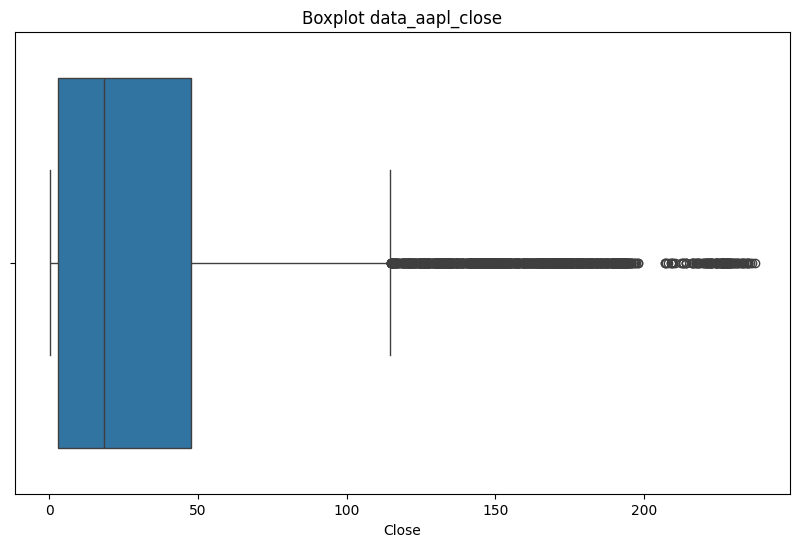

Batas bawah: -63.98656105995178
Batas atas: 114.76593565940857

Ukuran dataset sebelum menghapus outliers: (6016, 2)
Ukuran dataset setelah menghapus outliers: (4954, 2)

Dataset tanpa outliers berhasil disimpan ke 'data_aapl_no_outliers.csv'

=== Penilaian Dataset: data_msft_close.csv ===
=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6016 non-null   object 
 1   Close   6016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.1+ KB

=== Jumlah Missing Values ===
Date     0
Close    0
dtype: int64

Jumlah Duplikasi:  0

=== Statistik Deskriptif ===
             Close
count  6016.000000
mean     93.765000
std     109.918600
min      15.150000
25%      27.080000
50%      33.297499
75%     108.774998
max     467.559998


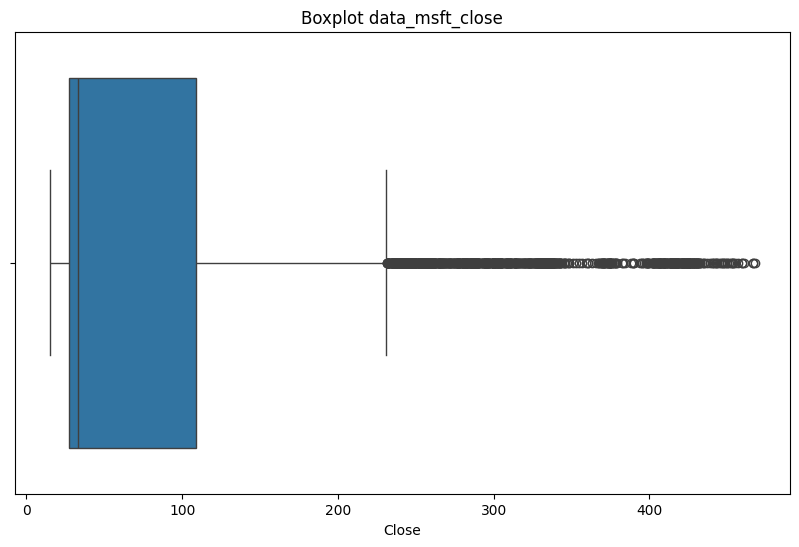

Batas bawah: -95.4624967575073
Batas atas: 231.31749439239496

Ukuran dataset sebelum menghapus outliers: (6016, 2)
Ukuran dataset setelah menghapus outliers: (5069, 2)

Dataset tanpa outliers berhasil disimpan ke 'data_msft_no_outliers.csv'

=== Penilaian Dataset: data_amzn_close.csv ===
=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6016 non-null   object 
 1   Close   6016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.1+ KB

=== Jumlah Missing Values ===
Date     0
Close    0
dtype: int64

Jumlah Duplikasi:  0

=== Statistik Deskriptif ===
             Close
count  6016.000000
mean     44.895443
std      57.943463
min       0.298500
25%       2.466000
50%      12.810750
75%      86.084877
max     214.100006


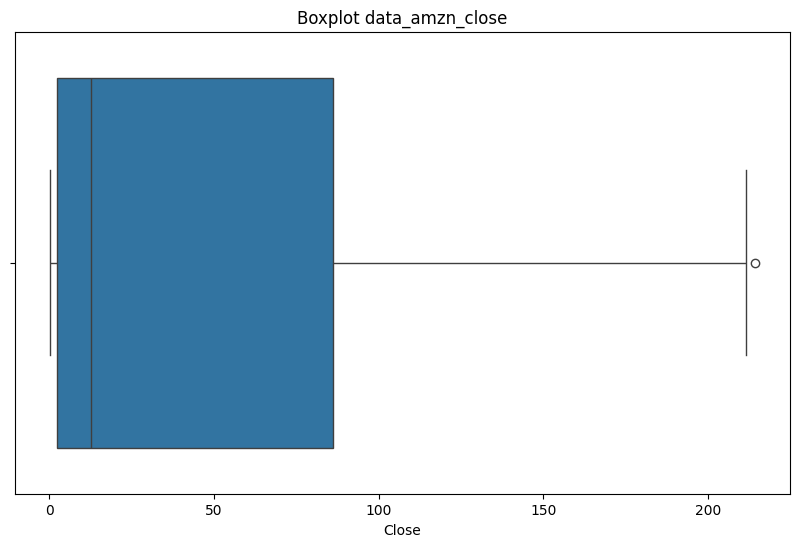

Batas bawah: -122.96231546998024
Batas atas: 211.5131925046444

Ukuran dataset sebelum menghapus outliers: (6016, 2)
Ukuran dataset setelah menghapus outliers: (6015, 2)

Dataset tanpa outliers berhasil disimpan ke 'data_amzn_no_outliers.csv'

=== Penilaian Dataset: data_brkb_close.csv ===
=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6016 non-null   object 
 1   Close   6016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.1+ KB

=== Jumlah Missing Values ===
Date     0
Close    0
dtype: int64

Jumlah Duplikasi:  0

=== Statistik Deskriptif ===
             Close
count  6016.000000
mean    142.117955
std     101.068579
min      40.000000
25%      61.759998
50%      94.520000
75%     200.009998
max     483.079987


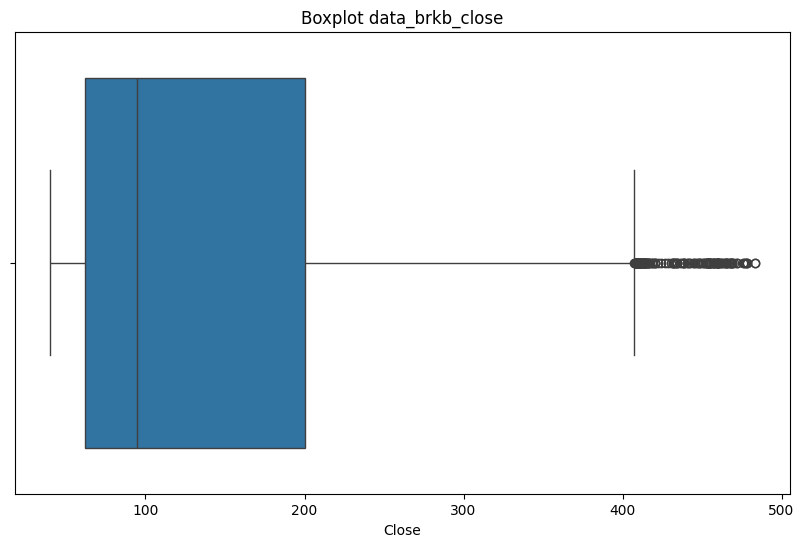

Batas bawah: -145.6150016784668
Batas atas: 407.3849983215332

Ukuran dataset sebelum menghapus outliers: (6016, 2)
Ukuran dataset setelah menghapus outliers: (5855, 2)

Dataset tanpa outliers berhasil disimpan ke 'data_brkb_no_outliers.csv'


In [9]:
assess_and_remove_outliers('data_aapl_close.csv', 'data_aapl_no_outliers.csv')  # Apple
assess_and_remove_outliers('data_msft_close.csv', 'data_msft_no_outliers.csv')  # Microsoft
assess_and_remove_outliers('data_amzn_close.csv', 'data_amzn_no_outliers.csv')  # Amazon
assess_and_remove_outliers('data_brkb_close.csv', 'data_brkb_no_outliers.csv')  # Berkshire Hathaway

**Insight dari Hasil Analisis dan Visualisasi Data untuk Variabel X**

1. **Struktur dan Konsistensi Data**  
   - Semua dataset (`data_aapl_close.csv`, `data_msft_close.csv`, `data_amzn_close.csv`, dan `data_brkb_close.csv`) memiliki **6016 baris** dengan **dua kolom utama** (`Date` dan `Close`), tanpa nilai yang hilang (*missing values*) maupun duplikasi.
   - Kolom `Close` berbentuk numerik (*float64*), sementara kolom `Date` masih berupa tipe objek yang perlu dikonversi ke datetime.

2. **Statistik Deskriptif**  
   - **Apple (`data_aapl_close.csv`):**
     - Rata-rata harga penutupan: **43.76**, dengan standar deviasi **59.99**, menunjukkan volatilitas harga yang besar.
     - Harga minimum: **0.23**, maksimum: **237.33**.
     - Sebagian besar harga berada dalam rentang **3.04** hingga **47.73** (*IQR*).
   - **Microsoft (`data_msft_close.csv`):**
     - Rata-rata harga penutupan: **93.76**, dengan standar deviasi **109.92**.
     - Harga minimum: **15.15**, maksimum: **467.56**.
     - Sebagian besar harga berada dalam rentang **27.08** hingga **108.77** (*IQR*).
   - **Amazon (`data_amzn_close.csv`):**
     - Rata-rata harga penutupan: **44.89**, dengan standar deviasi **57.94**.
     - Harga minimum: **0.29**, maksimum: **214.10**.
     - Sebagian besar harga berada dalam rentang **2.47** hingga **86.08** (*IQR*).
   - **Berkshire Hathaway (`data_brkb_close.csv`):**
     - Rata-rata harga penutupan: **142.12**, dengan standar deviasi **101.07**.
     - Harga minimum: **40.00**, maksimum: **483.08**.
     - Sebagian besar harga berada dalam rentang **61.76** hingga **200.01** (*IQR*).

3. **Deteksi Outliers**  
   - Menggunakan metode *Interquartile Range (IQR)* untuk menentukan batas bawah dan atas:
     - **Apple (AAPL):**  
       - Batas bawah: **-63.99** (tidak relevan karena semua nilai positif).
       - Batas atas: **114.77**. Data outliers ditemukan di atas batas atas.
     - **Microsoft (MSFT):**
       - Batas bawah: **-95.46** (tidak relevan karena semua nilai positif).
       - Batas atas: **231.32**. Data outliers ditemukan di atas batas atas.
     - **Amazon (AMZN):**
       - Batas bawah: **-122.96** (tidak relevan karena semua nilai positif).
       - Batas atas: **211.51**. Hampir semua data berada dalam rentang normal, hanya satu outlier terdeteksi.
     - **Berkshire Hathaway (BRK-B):**
       - Batas bawah: **-145.62** (tidak relevan karena semua nilai positif).
       - Batas atas: **407.38**. Data outliers ditemukan di atas batas atas.

4. **Ukuran Dataset Setelah Menghapus Outliers**  
   - **Apple (AAPL):**  
     - Dataset awal memiliki **6016 baris**, berkurang menjadi **4954 baris** setelah menghapus **1062 outliers**.
   - **Microsoft (MSFT):**  
     - Dataset awal memiliki **6016 baris**, berkurang menjadi **5069 baris** setelah menghapus **947 outliers**.
   - **Amazon (AMZN):**  
     - Dataset awal memiliki **6016 baris**, berkurang menjadi **6015 baris** setelah menghapus hanya **1 outlier**.
   - **Berkshire Hathaway (BRK-B):**  
     - Dataset awal memiliki **6016 baris**, berkurang menjadi **5855 baris** setelah menghapus **161 outliers**.

5. **Visualisasi Data dengan Boxplot**  
   - **Apple (AAPL):**  
     - Outliers terlihat pada bagian atas (*upper whisker*), menunjukkan harga saham yang melonjak pada periode tertentu.
   - **Microsoft (MSFT):**  
     - Outliers signifikan pada bagian atas, mencerminkan volatilitas harga saham.
   - **Amazon (AMZN):**  
     - Hampir semua data berada dalam rentang normal, hanya ada satu outlier di bagian atas.
   - **Berkshire Hathaway (BRK-B):**  
     - Outliers terlihat pada bagian atas, mencerminkan beberapa kenaikan harga saham yang signifikan.

**Kesimpulan**
- Semua dataset menunjukkan adanya volatilitas harga yang besar, terutama pada saham teknologi seperti Apple dan Microsoft.
- Proses penghapusan outliers telah meningkatkan kualitas data dengan menghilangkan nilai ekstrem yang dapat memengaruhi analisis.
- Data yang telah dibersihkan siap digunakan untuk penggabungan dan analisis selanjutnya.


In [10]:
nasdaq_df = pd.read_csv('data_nasdaq_no_outliers.csv')
spy_df = pd.read_csv('data_spy_no_outliers.csv')
aapl_df = pd.read_csv('data_aapl_no_outliers.csv')
msft_df = pd.read_csv('data_msft_no_outliers.csv')
amzn_df = pd.read_csv('data_amzn_no_outliers.csv')
brkb_df = pd.read_csv('data_brkb_no_outliers.csv')

In [11]:
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
brkb_df['Date'] = pd.to_datetime(brkb_df['Date'])

In [12]:
merged_df = nasdaq_df.merge(spy_df, on='Date', how='inner', suffixes=('_nasdaq', '_spy'))
merged_df = merged_df.merge(aapl_df, on='Date', how='inner', suffixes=('', '_aapl'))
merged_df = merged_df.merge(msft_df, on='Date', how='inner', suffixes=('', '_msft'))
merged_df = merged_df.merge(amzn_df, on='Date', how='inner', suffixes=('', '_amzn'))
merged_df = merged_df.merge(brkb_df, on='Date', how='inner', suffixes=('', '_brkb'))

In [13]:
merged_df.rename(columns={
    'Close': 'Close_aapl',
    'Close_spy': 'Close_spy',
    'Close_nasdaq': 'Close_nasdaq',
    'Close_msft': 'Close_msft',
    'Close_amzn': 'Close_amzn',
    'Close_brkb': 'Close_brkb'
}, inplace=True)

In [14]:
merged_df.to_csv('merged_dataset.csv', index=False)
print("\nDataset berhasil digabungkan dan disimpan ke 'merged_dataset.csv'")


Dataset berhasil digabungkan dan disimpan ke 'merged_dataset.csv'


In [15]:
print(merged_df.head())

        Date  Close_nasdaq   Close_spy  Close_aapl  Close_msft  Close_amzn  \
0 2001-01-02   2291.860107  128.812500    0.265625    21.68750    0.693750   
1 2001-01-03   2616.689941  135.000000    0.292411    23.96875    0.878125   
2 2001-01-04   2566.830078  133.546875    0.304688    24.21875    0.775000   
3 2001-01-05   2407.649902  129.187500    0.292411    24.56250    0.728125   
4 2001-01-08   2395.919922  130.187500    0.295759    24.46875    0.746875   

   Close_brkb  
0   48.220001  
1   46.700001  
2   45.880001  
3   44.980000  
4   44.840000  


In [16]:
print("\n=== Statistik Deskriptif Dataset yang Digabungkan ===")
print(merged_df.describe())


=== Statistik Deskriptif Dataset yang Digabungkan ===
                                Date  Close_nasdaq    Close_spy   Close_aapl  \
count                           4954   4954.000000  4954.000000  4954.000000   
mean   2010-11-08 09:48:54.356075776   3664.909756   163.638503    18.024411   
min              2001-01-02 00:00:00   1114.109985    68.110001     0.234286   
25%              2005-12-06 06:00:00   2076.517456   115.069998     2.097857   
50%              2010-11-06 12:00:00   2619.234985   136.224998    11.053750   
75%              2015-10-08 18:00:00   4906.040039   207.465000    27.628124   
max              2020-11-23 00:00:00  11880.629883   357.459991   114.607498   
std                              NaN   2216.961655    65.038278    20.554150   

        Close_msft   Close_amzn   Close_brkb  
count  4954.000000  4954.000000  4954.000000  
mean     47.439691    22.515521   103.140690  
min      15.150000     0.298500    40.000000  
25%      26.502500     2.120875    5

**Statistik Deskriptif Dataset yang Digabungkan**

1. **Jumlah Data**  
   - Dataset gabungan memiliki **4954 baris**, yang merupakan hasil dari penghapusan outliers pada semua dataset variabel X dan Y.

2. **Rata-Rata Harga Penutupan**  
   - **NASDAQ Composite (`Close_nasdaq`):** Rata-rata harga penutupan adalah **3664.91**, mencerminkan kinerja pasar teknologi dalam rentang waktu yang dianalisis.
   - **S&P 500 ETF (`Close_spy`):** Rata-rata harga penutupan adalah **163.64**, menunjukkan performa keseluruhan pasar.
   - **Apple (`Close_aapl`):** Rata-rata harga penutupan adalah **18.02**, lebih rendah dibandingkan saham lain, yang konsisten dengan fakta bahwa harga saham Apple mengalami beberapa kali *stock split*.
   - **Microsoft (`Close_msft`):** Rata-rata harga penutupan adalah **47.44**, menunjukkan kinerja stabil selama periode waktu.
   - **Amazon (`Close_amzn`):** Rata-rata harga penutupan adalah **22.52**, lebih tinggi dibandingkan Apple namun tetap mencerminkan volatilitas pasar.
   - **Berkshire Hathaway (`Close_brkb`):** Rata-rata harga penutupan adalah **103.14**, yang lebih tinggi dibandingkan rata-rata saham teknologi.

3. **Nilai Minimum dan Maksimum**  
   - **NASDAQ Composite:**  
     - Minimum: **1114.11**, terjadi pada awal periode analisis.  
     - Maksimum: **11880.63**, mencerminkan puncak kenaikan di pasar teknologi.
   - **S&P 500 ETF:**  
     - Minimum: **68.11**, mencerminkan titik terendah di pasar luas.  
     - Maksimum: **357.46**, menunjukkan puncak kinerja pasar secara keseluruhan.
   - **Apple:**  
     - Minimum: **0.23**, mencerminkan harga saham yang sangat rendah setelah *stock split*.  
     - Maksimum: **114.61**, menunjukkan lonjakan signifikan dalam harga saham Apple.
   - **Microsoft:**  
     - Minimum: **15.15**, harga saham yang relatif rendah selama analisis.  
     - Maksimum: **216.54**, menunjukkan pertumbuhan yang kuat.
   - **Amazon:**  
     - Minimum: **0.29**, mencerminkan harga awal yang sangat rendah.  
     - Maksimum: **161.25**, menunjukkan lonjakan harga saham Amazon.
   - **Berkshire Hathaway:**  
     - Minimum: **40.00**, harga saham terendah dalam periode analisis.  
     - Maksimum: **230.20**, menunjukkan stabilitas dibandingkan saham teknologi.

4. **Distribusi Data (IQR)**  
   - **NASDAQ Composite:** Sebagian besar harga berada antara **2076.52** hingga **4906.04**, dengan standar deviasi **2216.96**, mencerminkan volatilitas tinggi.
   - **S&P 500 ETF:** Sebagian besar harga berada antara **115.07** hingga **207.47**, dengan standar deviasi **65.04**, lebih stabil dibandingkan NASDAQ.
   - **Apple:** Harga mayoritas berada antara **2.10** hingga **27.63**, dengan standar deviasi **20.55**, menunjukkan lonjakan yang signifikan pada harga saham tertentu.
   - **Microsoft:** Harga berada antara **26.50** hingga **48.72**, dengan standar deviasi **38.45**, mencerminkan volatilitas moderat.
   - **Amazon:** Harga berkisar antara **2.12** hingga **26.79**, dengan standar deviasi **32.38**, menunjukkan fluktuasi yang lebih tinggi.
   - **Berkshire Hathaway:** Harga berkisar antara **59.08** hingga **142.50**, dengan standar deviasi **53.78**, menunjukkan stabilitas relatif.

5. **Titik Tengah (Median)**  
   - **NASDAQ Composite:** Median berada di **2619.23**, lebih rendah dari rata-rata, menunjukkan adanya data tinggi yang memengaruhi rata-rata.
   - **S&P 500 ETF:** Median berada di **136.22**, lebih rendah dari rata-rata, menunjukkan pola serupa dengan NASDAQ.
   - **Apple:** Median di **11.05**, menunjukkan dominasi harga saham rendah selama analisis.
   - **Microsoft:** Median di **29.71**, menunjukkan harga saham relatif stabil.
   - **Amazon:** Median di **8.24**, lebih rendah dari rata-rata, menunjukkan harga saham yang mulai dari nilai rendah.
   - **Berkshire Hathaway:** Median di **80.49**, mencerminkan distribusi harga yang cukup stabil.

**Kesimpulan**
- Dataset gabungan mencerminkan volatilitas yang signifikan di pasar teknologi, terutama untuk saham seperti NASDAQ, Apple, Microsoft, dan Amazon.
- Harga saham Berkshire Hathaway lebih stabil dibandingkan saham teknologi, mencerminkan perbedaan sektor industri.
- Dataset gabungan ini memberikan fondasi yang solid untuk analisis prediktif, dengan rentang harga yang telah disesuaikan melalui pembersihan data dan penghapusan outliers.


# Exploratory Data Analysis - Univariate Analysis

1. **Memuat Dataset Gabungan**  
   - Dataset hasil penggabungan sebelumnya (`merged_dataset.csv`) dimuat ke dalam DataFrame untuk dianalisis.

2. **Memisahkan Variabel Target dan Fitur Numerik**  
   - Variabel target (`Close_nasdaq`, `Close_spy`) dikelompokkan untuk dianalisis secara terpisah.  
   - Variabel fitur numerik (`Close_aapl`, `Close_msft`, `Close_amzn`, `Close_brkb`) dikelompokkan sebagai prediktor yang akan dianalisis secara individual.

3. **Univariate Analysis untuk Variabel Target (Y)**  
   - **Statistik Deskriptif:**  
     - Fungsi `describe()` digunakan untuk menghitung statistik ringkasan (rata-rata, median, standar deviasi, nilai minimum dan maksimum, dll.) untuk setiap variabel target.
   - **Visualisasi Histogram:**  
     - Histogram dibuat untuk setiap variabel target menggunakan `matplotlib` untuk menggambarkan distribusi data secara visual.  
     - Histogram membantu mengidentifikasi pola distribusi, frekuensi nilai, dan potensi outliers pada variabel target.

4. **Univariate Analysis untuk Fitur Numerik (X)**  
   - **Statistik Deskriptif:**  
     - Statistik ringkasan dihitung untuk setiap fitur numerik untuk memahami distribusi dan karakteristik masing-masing variabel.
   - **Visualisasi Histogram:**  
     - Histogram dibuat untuk setiap fitur numerik untuk menggambarkan distribusi data secara visual.  
     - Histogram digunakan untuk mengevaluasi pola distribusi, seperti simetris, miring ke kiri/kanan, atau adanya outliers.

5. **Visualisasi**  
   - Histogram dilengkapi dengan parameter:
     - **Bins:** Histogram dibagi menjadi 50 bagian untuk detail lebih baik.
     - **Color:** Warna biru digunakan untuk target (Y) dan hijau untuk fitur numerik (X).
     - **Edgecolor:** Setiap bar histogram memiliki tepi hitam untuk visibilitas yang lebih baik.
   - Sumbu X menampilkan variabel yang dianalisis, sementara sumbu Y menunjukkan frekuensi kemunculan nilai tersebut.

6. **Grid pada Histogram**  
   - Grid pada sumbu Y diaktifkan untuk membantu membaca frekuensi dari histogram dengan lebih mudah.

- **Statistik Deskriptif:** Memberikan ringkasan numerik tentang distribusi data setiap variabel.
- **Histogram:** Memvisualisasikan pola distribusi data, membantu mengidentifikasi karakteristik seperti kemiringan, konsentrasi nilai, atau keberadaan outliers.


In [17]:
merged_df = pd.read_csv('merged_dataset.csv')
numerical_features = ['Close_aapl', 'Close_msft', 'Close_amzn', 'Close_brkb']  # Variabel X
target_features = ['Close_nasdaq', 'Close_spy']  # Variabel Y

=== Analisis Target (Close_nasdaq) ===
count     4954.000000
mean      3664.909756
std       2216.961655
min       1114.109985
25%       2076.517456
50%       2619.234985
75%       4906.040039
max      11880.629883
Name: Close_nasdaq, dtype: float64


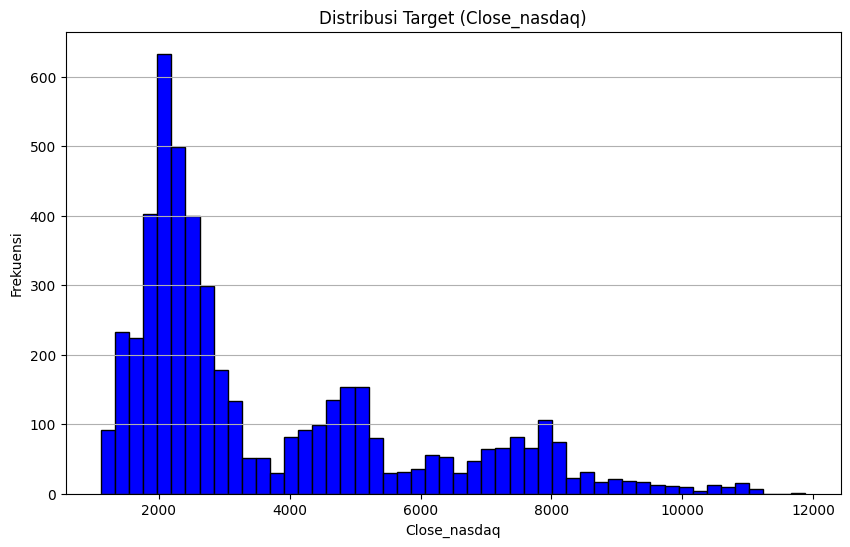

=== Analisis Target (Close_spy) ===
count    4954.000000
mean      163.638503
std        65.038278
min        68.110001
25%       115.069998
50%       136.224998
75%       207.465000
max       357.459991
Name: Close_spy, dtype: float64


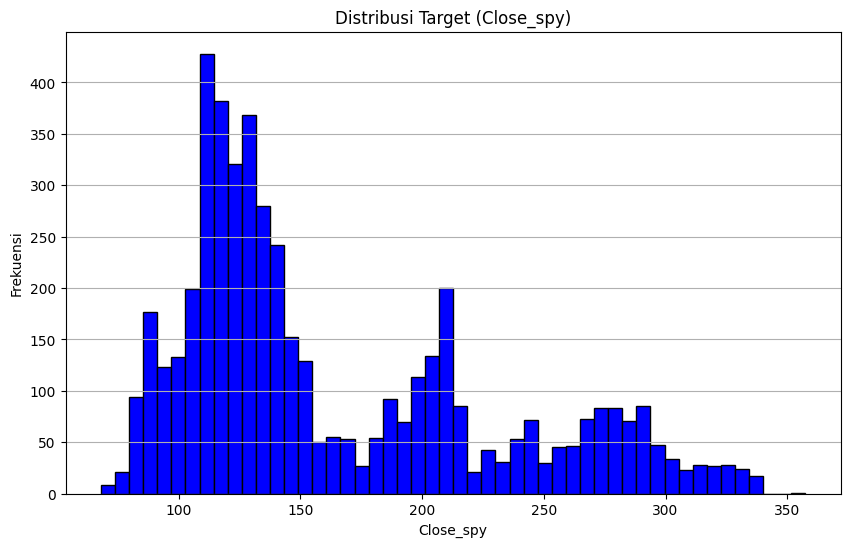

In [18]:
# Univariate Analysis untuk Target (Y)
for target in target_features:
    print(f"=== Analisis Target ({target}) ===")
    print(merged_df[target].describe())

    plt.figure(figsize=(10, 6))
    plt.hist(merged_df[target], bins=50, color='blue', edgecolor='black')
    plt.title(f"Distribusi Target ({target})")
    plt.xlabel(target)
    plt.ylabel("Frekuensi")
    plt.grid(axis='y')
    plt.show()

**Insight dari Analisis Target (Close_nasdaq dan Close_spy)**

1. **Distribusi Close_nasdaq**
   - **Statistik Deskriptif:**
     - Rata-rata harga penutupan NASDAQ adalah **3664.91**, dengan standar deviasi yang tinggi (**2216.96**), menunjukkan volatilitas yang signifikan.
     - Nilai minimum **1114.11** dan maksimum **11880.63** mencerminkan rentang harga yang sangat luas di pasar teknologi.
     - Median **2619.23** menunjukkan bahwa setengah dari harga berada di bawah nilai ini, yang lebih rendah dari rata-rata, mengindikasikan distribusi yang sedikit miring ke kanan.
     - Rentang interquartil (IQR): **2076.52** hingga **4906.04**, mencakup sebagian besar nilai.

   - **Distribusi Histogram:**
     - Mayoritas harga NASDAQ berkonsentrasi di rentang **2000 hingga 4000**, dengan frekuensi tertinggi di sekitar **2000**.
     - Distribusi menunjukkan adanya outliers pada harga tinggi, dengan nilai yang semakin jarang pada rentang di atas **5000**.
     - Pola distribusi cenderung *right-skewed*, mengindikasikan beberapa nilai tinggi yang signifikan.

2. **Distribusi Close_spy**
   - **Statistik Deskriptif:**
     - Rata-rata harga penutupan S&P 500 ETF adalah **163.64**, dengan standar deviasi **65.04**, menunjukkan volatilitas yang lebih rendah dibandingkan NASDAQ.
     - Nilai minimum **68.11** dan maksimum **357.46**, dengan rentang yang lebih sempit dibandingkan NASDAQ.
     - Median **136.22** menunjukkan distribusi yang mendekati simetris, dengan harga lebih sering berada di sekitar nilai ini.
     - Rentang interquartil (IQR): **115.07** hingga **207.47**, mencerminkan konsentrasi harga di sekitar rentang tersebut.

   - **Distribusi Histogram:**
     - Mayoritas harga S&P 500 ETF terkonsentrasi di dua kelompok besar, yaitu **100 hingga 150** dan **200 hingga 250**, yang mencerminkan perubahan signifikan pada waktu tertentu.
     - Histogram menunjukkan pola distribusi yang relatif seragam di luar rentang frekuensi tinggi, dengan sedikit outliers di harga tinggi.

3. **Perbandingan Close_nasdaq dan Close_spy**
   - **Volatilitas:** NASDAQ memiliki volatilitas yang jauh lebih tinggi dibandingkan S&P 500 ETF, sebagaimana ditunjukkan oleh standar deviasi yang lebih besar.
   - **Distribusi:** NASDAQ menunjukkan pola *right-skewed* dengan harga tinggi sebagai outliers, sedangkan S&P 500 ETF memiliki distribusi yang lebih seragam.
   - **Rentang:** NASDAQ memiliki rentang harga yang lebih luas dibandingkan S&P 500 ETF, mencerminkan pergerakan yang lebih dinamis di pasar teknologi.

4. **Kesimpulan**
   - NASDAQ mencerminkan volatilitas tinggi dan pergerakan harga yang dinamis di pasar teknologi, dengan beberapa lonjakan harga signifikan.
   - S&P 500 ETF lebih stabil dengan distribusi harga yang relatif terkonsentrasi, mencerminkan kinerja pasar luas.
   - Kedua target ini dapat memberikan wawasan yang berbeda untuk analisis prediktif, di mana NASDAQ mungkin lebih dipengaruhi oleh faktor spesifik teknologi, sementara S&P 500 mencerminkan tren pasar yang lebih umum.



=== Analisis Fitur: Close_aapl ===
count    4954.000000
mean       18.024411
std        20.554150
min         0.234286
25%         2.097857
50%        11.053750
75%        27.628124
max       114.607498
Name: Close_aapl, dtype: float64


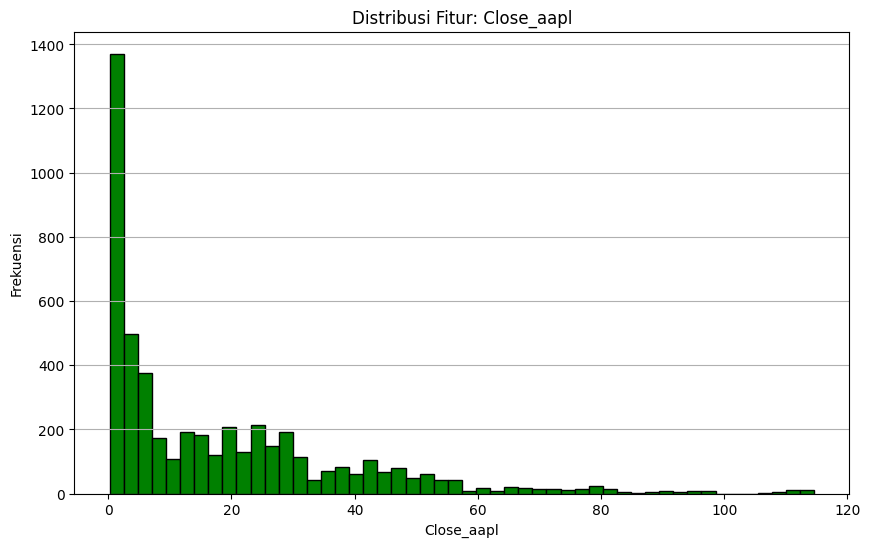


=== Analisis Fitur: Close_msft ===
count    4954.000000
mean       47.439691
std        38.445526
min        15.150000
25%        26.502500
50%        29.709999
75%        48.715001
max       216.539993
Name: Close_msft, dtype: float64


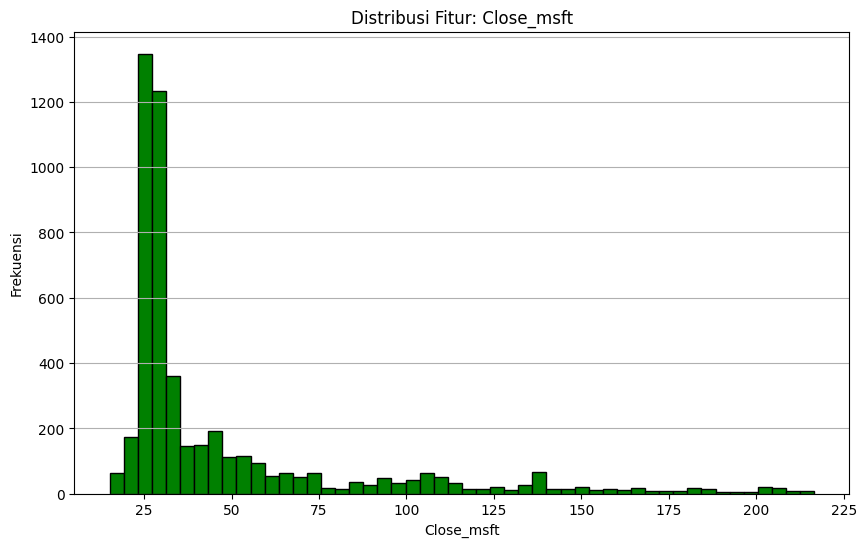


=== Analisis Fitur: Close_amzn ===
count    4954.000000
mean       22.515521
std        32.383346
min         0.298500
25%         2.120875
50%         8.244750
75%        26.792874
max       161.250000
Name: Close_amzn, dtype: float64


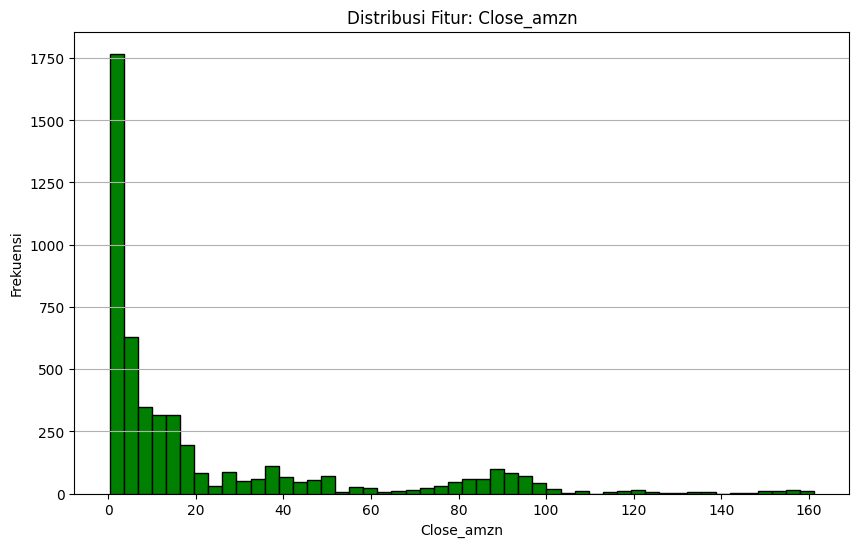


=== Analisis Fitur: Close_brkb ===
count    4954.000000
mean      103.140690
std        53.779184
min        40.000000
25%        59.080002
50%        80.489998
75%       142.497498
max       230.199997
Name: Close_brkb, dtype: float64


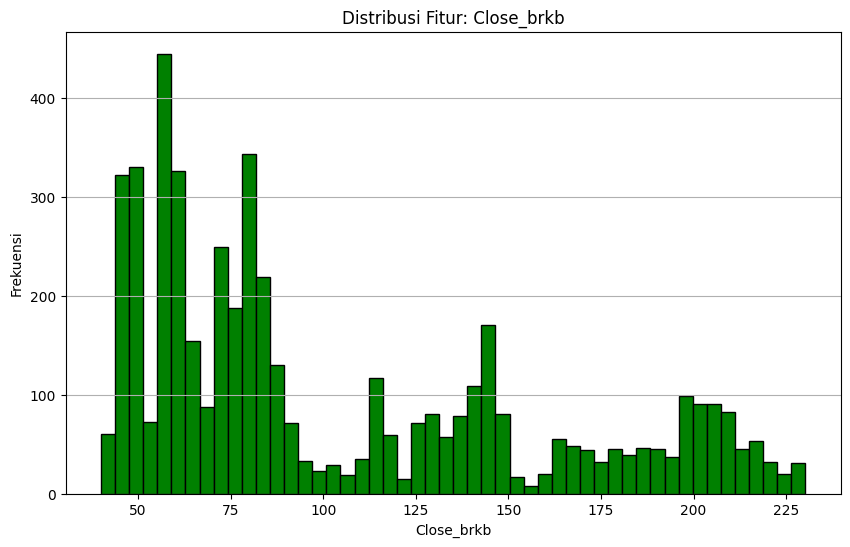

In [19]:
# Univariate Analysis untuk Fitur Numerik (X)
for feature in numerical_features:
    print(f"\n=== Analisis Fitur: {feature} ===")
    print(merged_df[feature].describe())

    plt.figure(figsize=(10, 6))
    plt.hist(merged_df[feature], bins=50, color='green', edgecolor='black')
    plt.title(f"Distribusi Fitur: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.grid(axis='y')
    plt.show()

**Insight dari Analisis Fitur (Close_aapl, Close_msft, Close_amzn, Close_brkb)**

1. **Distribusi Close_aapl (Apple)**
   - **Statistik Deskriptif:**
     - Rata-rata harga penutupan adalah **18.02**, dengan standar deviasi **20.55**, menunjukkan fluktuasi harga yang cukup signifikan.
     - Harga minimum adalah **0.23** dan maksimum adalah **114.61**, menunjukkan rentang harga yang luas.
     - Median berada di **11.05**, yang lebih rendah dari rata-rata, mengindikasikan distribusi yang sedikit miring ke kanan.
     - Rentang interquartil (IQR): **2.10** hingga **27.63**, mencakup sebagian besar harga saham.

   - **Distribusi Histogram:**
     - Histogram menunjukkan bahwa mayoritas harga saham Apple berada di rentang **0 hingga 20**, dengan frekuensi tertinggi pada harga sangat rendah (di bawah **5**).
     - Distribusi menunjukkan pola *right-skewed*, mencerminkan beberapa harga saham yang tinggi sebagai outliers.

2. **Distribusi Close_msft (Microsoft)**
   - **Statistik Deskriptif:**
     - Rata-rata harga penutupan adalah **47.44**, dengan standar deviasi **38.45**, mencerminkan fluktuasi harga yang cukup besar.
     - Harga minimum adalah **15.15** dan maksimum adalah **216.54**, menunjukkan rentang yang luas.
     - Median berada di **29.71**, lebih rendah dari rata-rata, yang juga mengindikasikan distribusi yang miring ke kanan.
     - Rentang interquartil (IQR): **26.50** hingga **48.72**, mencakup sebagian besar harga saham.

   - **Distribusi Histogram:**
     - Sebagian besar harga saham Microsoft terkonsentrasi di rentang **25 hingga 50**, dengan frekuensi tertinggi di sekitar nilai tersebut.
     - Distribusi juga menunjukkan pola *right-skewed*, dengan beberapa nilai tinggi sebagai outliers.

3. **Distribusi Close_amzn (Amazon)**
   - **Statistik Deskriptif:**
     - Rata-rata harga penutupan adalah **22.52**, dengan standar deviasi **32.38**, menunjukkan fluktuasi harga yang sangat tinggi.
     - Harga minimum adalah **0.30** dan maksimum adalah **161.25**, menunjukkan rentang harga yang lebar.
     - Median berada di **8.24**, yang lebih rendah dari rata-rata, mencerminkan distribusi yang sangat miring ke kanan.
     - Rentang interquartil (IQR): **2.12** hingga **26.79**, mencakup sebagian besar harga saham.

   - **Distribusi Histogram:**
     - Mayoritas harga saham Amazon berada di rentang **0 hingga 20**, dengan frekuensi tertinggi di bawah **5**.
     - Distribusi sangat *right-skewed*, mencerminkan adanya harga tinggi sebagai outliers.

4. **Distribusi Close_brkb (Berkshire Hathaway)**
   - **Statistik Deskriptif:**
     - Rata-rata harga penutupan adalah **103.14**, dengan standar deviasi **53.78**, menunjukkan fluktuasi harga yang moderat.
     - Harga minimum adalah **40.00** dan maksimum adalah **230.20**, dengan rentang yang lebih stabil dibandingkan fitur lainnya.
     - Median berada di **80.49**, sedikit lebih rendah dari rata-rata.
     - Rentang interquartil (IQR): **59.08** hingga **142.50**, mencakup sebagian besar harga saham.

   - **Distribusi Histogram:**
     - Histogram menunjukkan distribusi harga yang lebih merata dibandingkan fitur lain, dengan beberapa konsentrasi di sekitar **50 hingga 150**.
     - Distribusi tidak terlalu miring, menunjukkan kestabilan harga saham.

5. **Perbandingan Fitur**
   - **Apple dan Amazon** memiliki distribusi yang sangat miring ke kanan, menunjukkan mayoritas harga berada pada rentang rendah dengan beberapa outliers pada harga tinggi.
   - **Microsoft** menunjukkan distribusi yang miring ke kanan, tetapi dengan konsentrasi harga yang lebih tinggi di rentang tengah.
   - **Berkshire Hathaway** memiliki distribusi yang paling stabil dengan pola harga yang lebih terpusat.

6. **Kesimpulan**
   - Saham teknologi seperti Apple, Microsoft, dan Amazon menunjukkan volatilitas tinggi, dengan rentang harga yang lebih luas dan distribusi yang *right-skewed*.
   - Saham Berkshire Hathaway lebih stabil dibandingkan saham teknologi, mencerminkan karakteristik sektor yang berbeda.
   - Informasi ini memberikan wawasan tentang pola harga saham yang dapat digunakan dalam analisis prediktif.


# Exploratory Data Analysis - Multivariate Analysis

#### Tahapan yang Dilakukan:

1. **Definisi Variabel**
   - **Target (Y):** Variabel target yang dianalisis adalah `Close_nasdaq` dan `Close_spy`.
   - **Fitur Numerik (X):** Variabel prediktor meliputi `Close_aapl`, `Close_msft`, `Close_amzn`, dan `Close_brkb`.

2. **Korelasi antara Fitur Numerik dan Target**
   - **Membuat Matriks Korelasi:**  
     - Matriks korelasi dihitung menggunakan metode `.corr()` pada DataFrame.  
     - Matriks ini menunjukkan hubungan linear antar variabel dengan nilai antara **-1 hingga 1**:
       - **1:** Korelasi positif sempurna (variabel bergerak searah).  
       - **-1:** Korelasi negatif sempurna (variabel bergerak berlawanan arah).  
       - **0:** Tidak ada hubungan linear.
   - **Visualisasi dengan Heatmap:**  
     - *Heatmap* dibuat menggunakan `seaborn` untuk memvisualisasikan matriks korelasi.  
     - *Heatmap* membantu mengidentifikasi hubungan yang kuat (positif atau negatif) antara variabel numerik dan target:
       - Warna merah/coklat menunjukkan korelasi positif.  
       - Warna biru menunjukkan korelasi negatif.  
       - Nilai ditampilkan pada setiap sel untuk memberikan wawasan kuantitatif.  
     - Ukuran figure dan skema warna diatur untuk meningkatkan visibilitas.

3. **Visualisasi Hubungan dengan Pairplot**
   - **Membuat Pairplot:**  
     - Pairplot dibuat menggunakan `seaborn` untuk memvisualisasikan hubungan antar variabel numerik dan target.  
     - Untuk setiap pasangan variabel:
       - Grafik *scatterplot* digunakan untuk memvisualisasikan hubungan dua variabel.  
       - *KDE plot* (kernel density estimation) digunakan pada diagonal untuk menggambarkan distribusi masing-masing variabel.
   - **Tujuan Pairplot:**  
     - Memberikan wawasan tentang pola hubungan antar variabel (linear, non-linear, atau lainnya).  
     - Membantu mengidentifikasi outliers yang mungkin ada dalam data.

4. **Tujuan Tahapan**
   - **Korelasi:**  
     - Mengidentifikasi variabel numerik mana yang memiliki hubungan signifikan dengan target.  
     - Menentukan apakah ada multikolinearitas antar fitur numerik (hubungan yang terlalu kuat antar fitur).
   - **Pairplot:**  
     - Memberikan wawasan visual tentang hubungan antar variabel dan pola distribusi data.
   - **Hasil Akhir:**  
     - Informasi dari matriks korelasi dan pairplot digunakan untuk memutuskan fitur mana yang relevan dalam membangun model prediksi dan memastikan data bebas dari redundansi yang signifikan.

In [23]:
numerical_features = ['Close_aapl', 'Close_msft', 'Close_amzn', 'Close_brkb']  # Variabel X
target_features = ['Close_nasdaq', 'Close_spy']  # Variabel Y

=== Korelasi antara Fitur Numerik dan Target ===


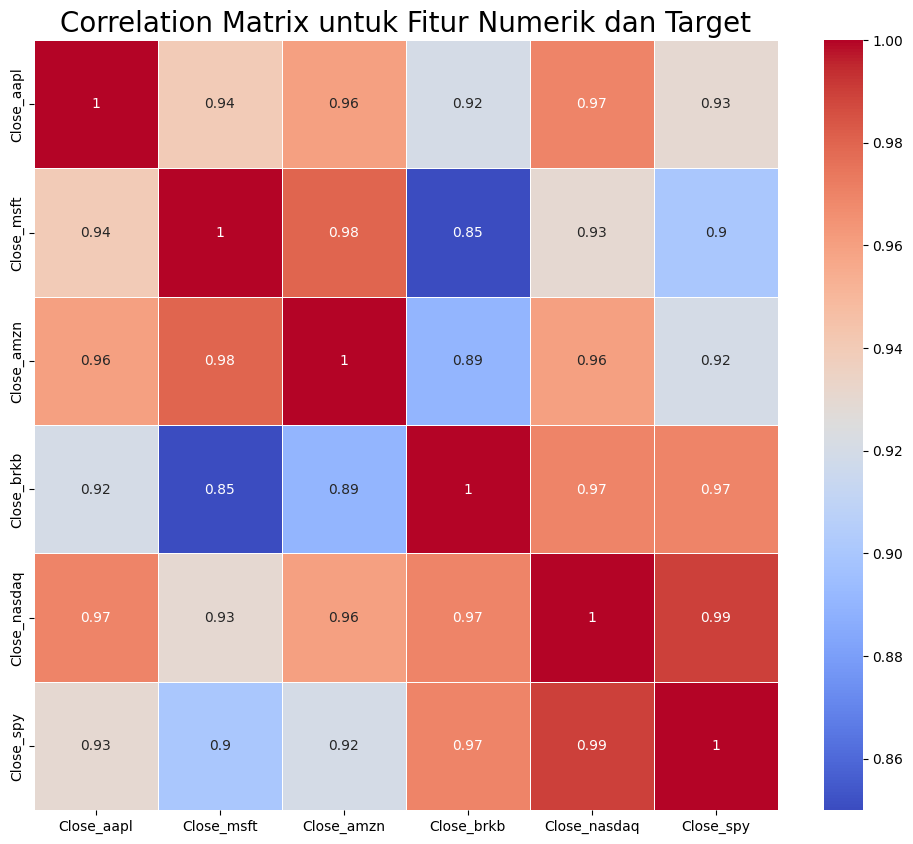

In [24]:
print("=== Korelasi antara Fitur Numerik dan Target ===")

correlation_matrix = merged_df[numerical_features + target_features].corr().round(2)

plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik dan Target", size=20)
plt.show()


**Insight dari Matriks Korelasi Fitur Numerik dan Target**

1. **Hubungan antara Fitur Numerik (X) dan Target (Y):**
   - **Close_nasdaq:**
     - Memiliki korelasi yang sangat tinggi dengan semua fitur numerik:
       - **Close_aapl:** 0.97 (positif sangat kuat).
       - **Close_msft:** 0.93 (positif sangat kuat).
       - **Close_amzn:** 0.96 (positif sangat kuat).
       - **Close_brkb:** 0.97 (positif sangat kuat).
     - Hal ini menunjukkan bahwa pergerakan harga saham teknologi (Apple, Microsoft, Amazon) dan saham Berkshire Hathaway sangat memengaruhi indeks NASDAQ.
   - **Close_spy:**
     - Juga menunjukkan korelasi positif yang tinggi dengan semua fitur numerik:
       - **Close_aapl:** 0.93.
       - **Close_msft:** 0.90.
       - **Close_amzn:** 0.92.
       - **Close_brkb:** 0.97.
     - Hal ini menunjukkan bahwa fitur numerik memiliki pengaruh yang kuat terhadap kinerja indeks pasar S&P 500.

2. **Hubungan Antar Fitur Numerik:**
   - **Close_aapl, Close_msft, dan Close_amzn:**
     - Memiliki korelasi yang sangat tinggi satu sama lain:
       - **Close_aapl vs Close_msft:** 0.94.
       - **Close_aapl vs Close_amzn:** 0.96.
       - **Close_msft vs Close_amzn:** 0.98.
     - Ini mencerminkan bahwa saham teknologi cenderung bergerak bersama, dipengaruhi oleh tren umum di sektor teknologi.
   - **Close_brkb dengan Fitur Teknologi:**
     - Korelasi antara **Close_brkb** (Berkshire Hathaway) dengan saham teknologi seperti Apple (0.92), Microsoft (0.85), dan Amazon (0.89) lebih rendah dibandingkan hubungan antar saham teknologi.
     - Hal ini menunjukkan bahwa meskipun ada hubungan, pergerakan saham Berkshire Hathaway kurang selaras dengan saham teknologi.

3. **Hubungan Antara Target (Close_nasdaq dan Close_spy):**
   - Korelasi antara **Close_nasdaq** dan **Close_spy** adalah **0.99**, menunjukkan hubungan yang sangat kuat.
   - Hal ini mengindikasikan bahwa kedua indeks ini bergerak hampir searah, meskipun NASDAQ lebih berfokus pada saham teknologi, sedangkan S&P 500 mencerminkan kinerja pasar yang lebih luas.

4. **Kesimpulan:**
   - Semua fitur numerik memiliki hubungan yang sangat kuat dengan kedua target, menunjukkan bahwa mereka relevan untuk digunakan dalam analisis prediktif.
   - Hubungan yang sangat kuat antar fitur teknologi (Apple, Microsoft, Amazon) menunjukkan potensi multikolinearitas, yang dapat memengaruhi interpretasi model jika semua fitur digunakan tanpa modifikasi.
   - Hubungan kuat antara **Close_brkb** dan target mencerminkan kontribusi saham Berkshire Hathaway terhadap indeks pasar.
   - Matriks korelasi ini memberikan dasar untuk memilih fitur yang relevan dan mempertimbangkan teknik pengurangan dimensi jika diperlukan.



=== Pairplot untuk Fitur Numerik dan Target ===


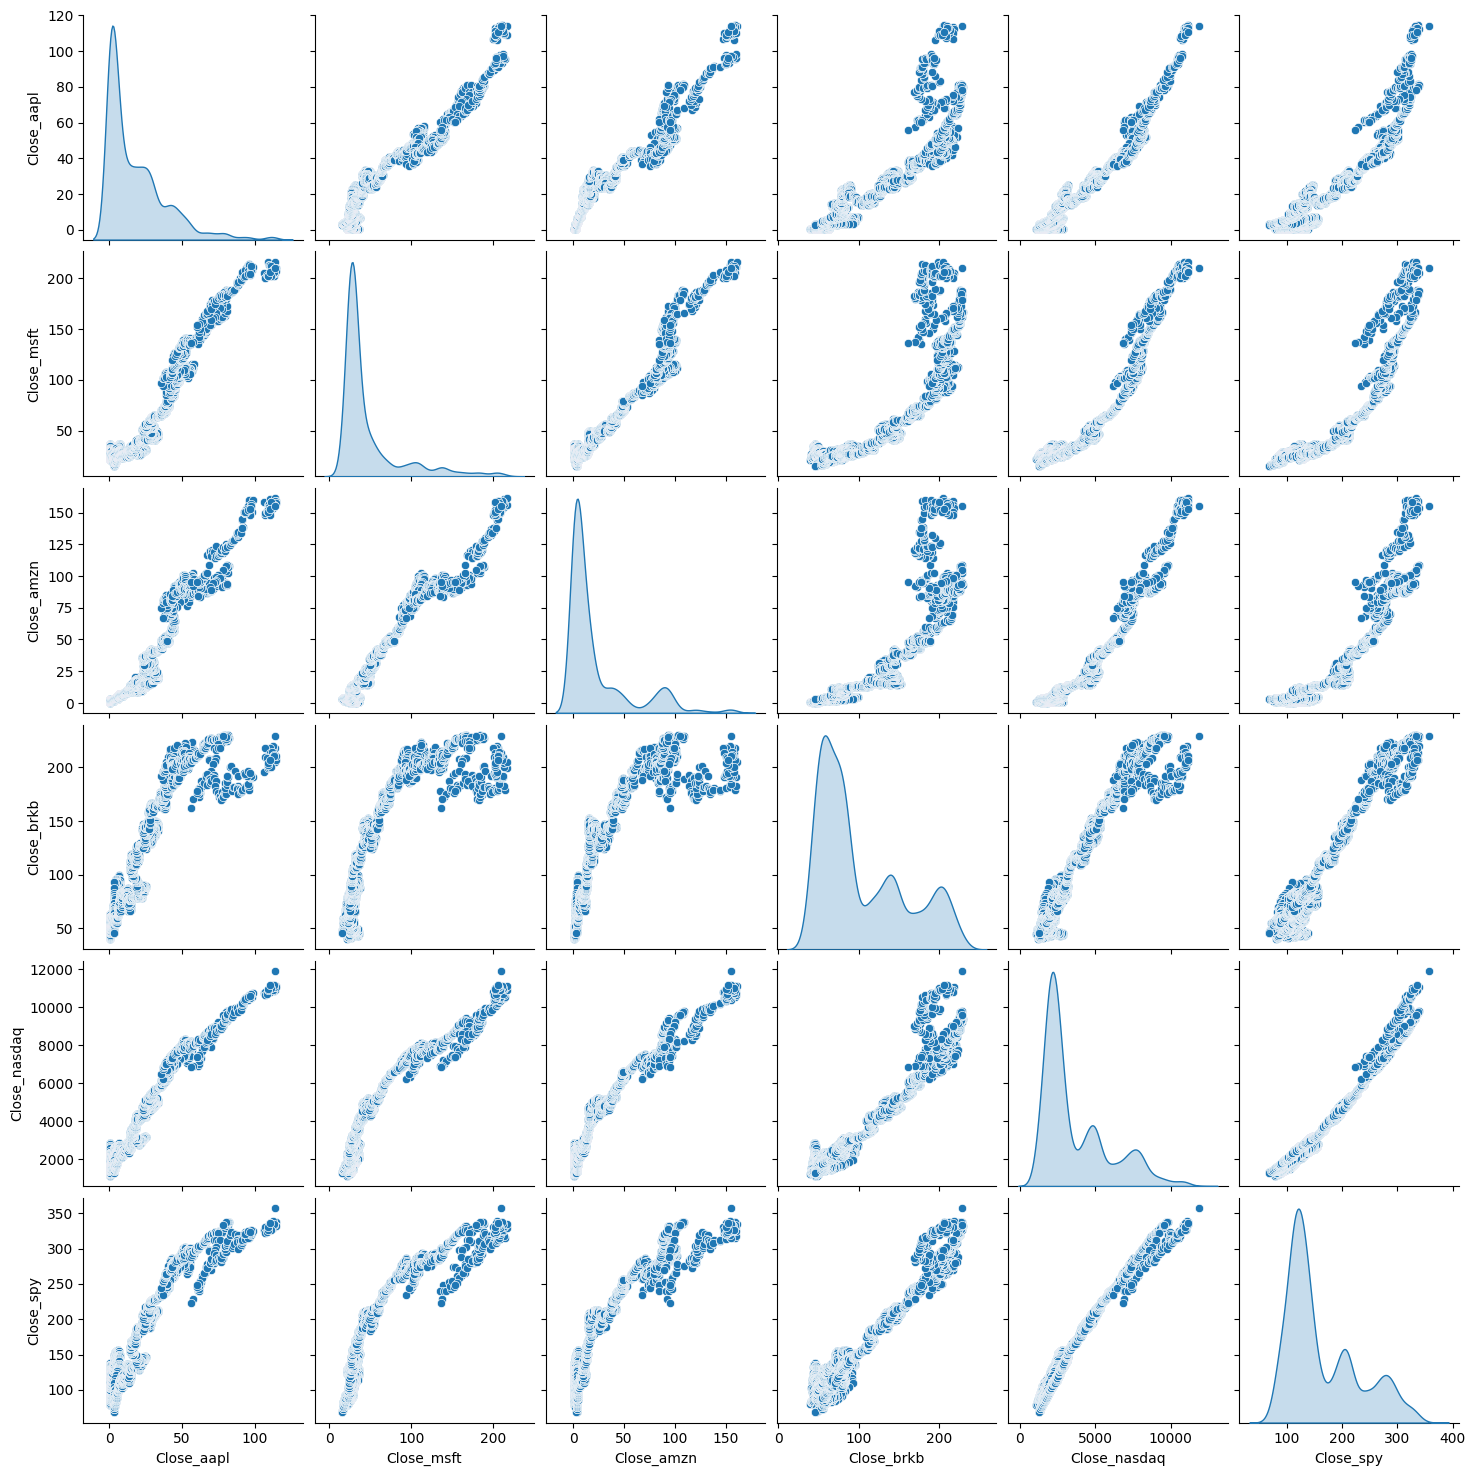

In [25]:
print("\n=== Pairplot untuk Fitur Numerik dan Target ===")
sns.pairplot(data=merged_df, vars=numerical_features + target_features, diag_kind='kde')
plt.show()

**Insight dari Pairplot Fitur Numerik dan Target**

1. **Hubungan Antar Variabel:**
   - Hampir semua scatterplot menunjukkan hubungan positif yang kuat di antara fitur numerik (`Close_aapl`, `Close_msft`, `Close_amzn`, `Close_brkb`) dan target (`Close_nasdaq`, `Close_spy`).
   - Scatterplot menunjukkan pola linier yang jelas, terutama untuk hubungan antara:
     - **Close_aapl** dengan **Close_nasdaq** dan **Close_spy**.
     - **Close_msft** dengan **Close_nasdaq** dan **Close_spy**.
     - **Close_amzn** dengan **Close_nasdaq** dan **Close_spy**.
     - **Close_brkb** dengan **Close_nasdaq** dan **Close_spy**.

2. **Distribusi Variabel:**
   - **Distribusi pada diagonal pairplot (KDE plot):**
     - **Close_aapl, Close_amzn:** Distribusi sangat miring ke kanan (*right-skewed*), mencerminkan bahwa sebagian besar harga saham berada di kisaran rendah, tetapi ada outliers dengan harga tinggi.
     - **Close_msft:** Distribusi lebih tersebar dibandingkan Apple dan Amazon, tetapi masih menunjukkan pola *right-skewed*.
     - **Close_brkb:** Distribusi lebih merata dibandingkan saham teknologi, dengan konsentrasi harga yang lebih tinggi di kisaran tengah.
     - **Close_nasdaq, Close_spy:** Distribusi keduanya lebih menyerupai pola lonceng dengan sedikit *right-skewness*, menunjukkan rentang harga yang luas.

3. **Korelasi Visual:**
   - Scatterplot mempertegas hasil matriks korelasi:
     - **Close_nasdaq** dan **Close_spy** menunjukkan hubungan linier yang sangat kuat, mencerminkan pergerakan yang hampir identik antara kedua indeks ini.
     - Hubungan antara fitur numerik dan target juga menunjukkan pola linier positif yang kuat, yang mengindikasikan bahwa fitur ini memiliki pengaruh signifikan terhadap target.

4. **Outliers:**
   - Beberapa scatterplot menunjukkan titik-titik yang berada di luar pola utama (outliers). Hal ini terutama terlihat pada:
     - **Close_aapl** dan **Close_amzn**, yang menunjukkan beberapa harga tinggi yang tidak proporsional dengan pola utama.
     - **Close_msft** menunjukkan beberapa outliers di rentang harga tinggi.

5. **Hubungan Antar Fitur Numerik:**
   - Scatterplot antar fitur numerik seperti **Close_aapl** dengan **Close_msft** atau **Close_amzn** menunjukkan hubungan linier positif yang sangat kuat, mencerminkan multikolinearitas di antara saham teknologi.

6. **Kesimpulan:**
   - Fitur numerik (saham teknologi dan Berkshire Hathaway) memiliki hubungan linier yang kuat dengan target (Close_nasdaq dan Close_spy), menjadikannya relevan untuk digunakan dalam model prediktif.
   - Informasi ini dapat digunakan untuk mengidentifikasi fitur yang relevan dan memahami hubungan antar variabel dalam konteks prediktif.


# Data Preparation

#### Tahapan yang Dilakukan:

1. **Definisi Variabel Input dan Output**
   - **X (Fitur Numerik):** Variabel prediktor yang digunakan adalah `Close_aapl`, `Close_msft`, `Close_amzn`, dan `Close_brkb`.
   - **y (Target):** Variabel target adalah `Close_nasdaq` dan `Close_spy`.

2. **Pembagian Dataset ke Data Latih dan Data Uji (Train-Test Split)**
   - Dataset dibagi menjadi **data latih** (90%) dan **data uji** (10%) menggunakan fungsi `train_test_split` dari `sklearn`.
   - **Tujuan:** Memisahkan data untuk melatih model dan mengevaluasi performa model pada data yang tidak pernah dilihat sebelumnya.

3. **Print Jumlah Sampel**
   - Jumlah total sampel, sampel data latih, dan sampel data uji ditampilkan untuk memastikan pembagian dataset sesuai proporsi yang diinginkan.

4. **Standarisasi Fitur Numerik**
   - **Standarisasi Data:** Dilakukan menggunakan `StandardScaler` dari `sklearn` untuk memastikan semua fitur numerik memiliki skala yang sama, dengan rata-rata 0 dan standar deviasi 1:
     - **Fitting:** `scaler.fit(X_train)` digunakan untuk menghitung rata-rata dan standar deviasi pada data latih.
     - **Transformasi:** Fitur pada data latih (`X_train`) dan data uji (`X_test`) ditransformasi menggunakan parameter yang dihitung dari data latih.
   - **Tujuan:** Menghindari skala fitur yang berbeda memengaruhi hasil analisis atau performa model prediktif.

5. **Transformasi ke DataFrame**
   - Data hasil transformasi (standarisasi) dikonversi kembali ke bentuk DataFrame dengan kolom asli untuk kemudahan analisis dan visualisasi.

6. **Print Statistik Deskriptif Setelah Standarisasi**
   - Statistik deskriptif (rata-rata, standar deviasi, minimum, maksimum, dll.) dihitung untuk memastikan bahwa semua fitur numerik memiliki rata-rata 0 dan standar deviasi 1 setelah standarisasi.

7. **Visualisasi Distribusi Fitur Setelah Standarisasi**
   - Histogram dibuat untuk setiap fitur dalam data latih yang telah distandarisasi:
     - Menampilkan distribusi fitur dengan skala yang distandarisasi.
     - Membantu memastikan bahwa fitur memiliki distribusi yang sesuai untuk analisis lebih lanjut atau model prediksi.

#### Tujuan Utama:
- **Train-Test Split:** Memastikan data dibagi secara proporsional untuk pelatihan dan evaluasi model.
- **Standarisasi Fitur:** Menghilangkan pengaruh skala yang berbeda antar fitur, memastikan semua fitur berkontribusi setara dalam model prediksi.
- **Visualisasi:** Memberikan wawasan visual tentang efek standarisasi pada distribusi fitur.


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X = merged_df[['Close_aapl', 'Close_msft', 'Close_amzn', 'Close_brkb']]  # Fitur Numerik
y = merged_df[['Close_nasdaq', 'Close_spy']]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [28]:
print(f"Total jumlah sampel dalam dataset: {len(X)}")
print(f"Total jumlah sampel dalam dataset latih: {len(X_train)}")
print(f"Total jumlah sampel dalam dataset uji: {len(X_test)}")


Total jumlah sampel dalam dataset: 4954
Total jumlah sampel dalam dataset latih: 4458
Total jumlah sampel dalam dataset uji: 496


In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [30]:
print("\n=== Statistik Deskriptif Data Latih Setelah Standarisasi ===")
print(X_train_scaled.describe().round(4))


=== Statistik Deskriptif Data Latih Setelah Standarisasi ===
       Close_aapl  Close_msft  Close_amzn  Close_brkb
count   4458.0000   4458.0000   4458.0000   4458.0000
mean       0.0000     -0.0000      0.0000      0.0000
std        1.0001      1.0001      1.0001      1.0001
min       -0.8702     -0.8438     -0.6914     -1.1767
25%       -0.7766     -0.5491     -0.6351     -0.8236
50%       -0.3319     -0.4658     -0.4407     -0.4246
75%        0.4687      0.0553      0.1535      0.7296
max        4.6653      4.3711      4.2568      2.3399


**Insight dari Statistik Deskriptif Data Latih Setelah Standarisasi**

1. **Rata-Rata (Mean)**
   - **Rata-rata semua fitur setelah standarisasi adalah 0** (atau sangat mendekati 0).
   - Ini menunjukkan bahwa proses standarisasi berhasil menggeser data ke pusat distribusi pada rata-rata 0.

2. **Standar Deviasi (Std)**
   - **Standar deviasi semua fitur adalah 1** (atau sangat mendekati 1).
   - Hal ini menunjukkan bahwa variabilitas data telah distandarisasi sehingga setiap fitur memiliki tingkat penyebaran yang seragam.

3. **Nilai Minimum dan Maksimum**
   - Meskipun rata-rata 0 dan standar deviasi 1, nilai minimum dan maksimum bervariasi untuk setiap fitur:
     - **Close_aapl:** Min: -0.8702, Max: 4.6653.
     - **Close_msft:** Min: -0.8438, Max: 4.3711.
     - **Close_amzn:** Min: -0.6914, Max: 4.2568.
     - **Close_brkb:** Min: -1.1767, Max: 2.3399.
   - Nilai maksimum lebih tinggi dari rata-rata, menunjukkan adanya beberapa outliers positif setelah standarisasi.

4. **Kuartil (25%, 50%, 75%)**
   - Kuartil menunjukkan distribusi data setelah standarisasi:
     - **Kuartil 25% (Q1):** Semua fitur memiliki nilai negatif di kuartil bawah, menunjukkan sebagian besar data berada di bawah rata-rata.
     - **Median (Q2/50%):** Sebagian besar fitur juga memiliki median negatif, yang berarti lebih dari separuh data berada di bawah rata-rata.
     - **Kuartil 75% (Q3):** Fitur mulai memiliki nilai positif di kuartil atas, menunjukkan distribusi yang menyebar ke kanan.

5. **Penyebaran Data**
   - Semua fitur memiliki penyebaran data yang seragam setelah standarisasi.
   - **Close_aapl, Close_msft, dan Close_amzn** memiliki outliers positif yang lebih signifikan dibandingkan **Close_brkb**, seperti yang terlihat dari nilai maksimum yang lebih tinggi.

6. **Kesimpulan**
   - Standarisasi berhasil membuat setiap fitur memiliki distribusi dengan rata-rata 0 dan standar deviasi 1, tanpa memengaruhi pola distribusi asli data.
   - Fitur numerik memiliki penyebaran data yang konsisten dan siap digunakan dalam model prediksi, terutama untuk algoritma yang sensitif terhadap skala data seperti regresi linier atau jaringan saraf.

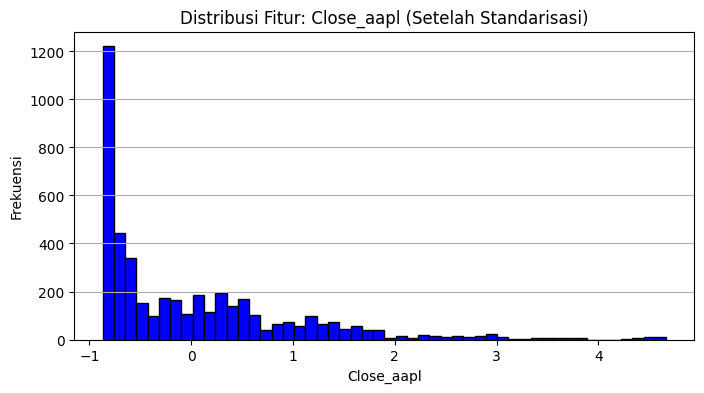

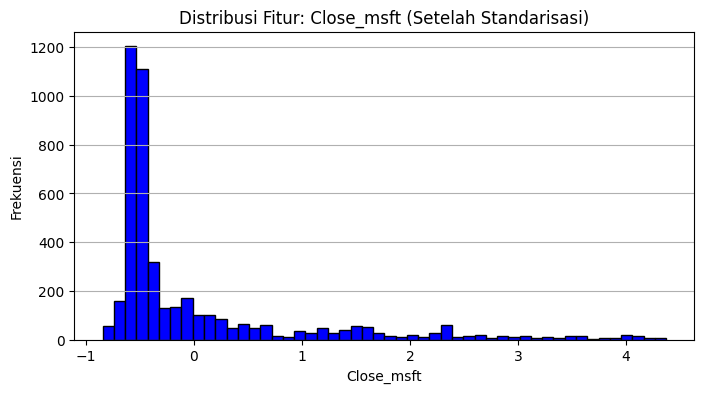

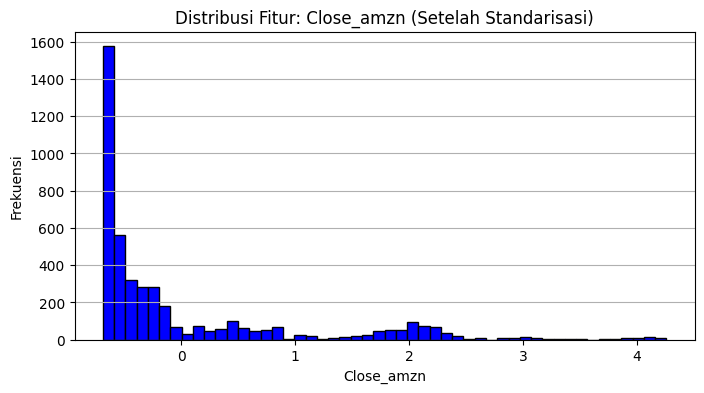

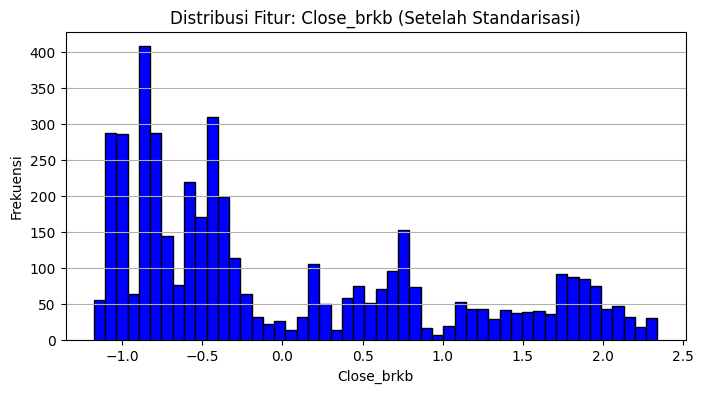

In [32]:
for col in X_train_scaled.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(X_train_scaled[col], bins=50, color='blue', edgecolor='black')
    plt.title(f"Distribusi Fitur: {col} (Setelah Standarisasi)")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.grid(axis='y')
    plt.show()

**Insight dari Distribusi Fitur Setelah Standarisasi**

1. **Close_aapl (Apple):**
   - Distribusi setelah standarisasi menunjukkan pola **miring ke kanan (right-skewed)**.
   - Mayoritas nilai berada di sekitar **-1 hingga 0**, mencerminkan bahwa sebagian besar harga saham Apple berada di bawah rata-rata sebelum standarisasi.
   - Outliers terlihat pada sisi kanan histogram, dengan nilai mencapai sekitar **4**, menunjukkan adanya beberapa harga saham yang jauh lebih tinggi dari rata-rata.

2. **Close_msft (Microsoft):**
   - Pola distribusi juga **miring ke kanan**, tetapi lebih terdistribusi dibandingkan Apple.
   - Mayoritas nilai berada di sekitar **-1 hingga 0**, tetapi terdapat distribusi lebih merata pada rentang **0 hingga 1**, menunjukkan data yang lebih tersebar.
   - Outliers juga terlihat dengan nilai maksimum mendekati **4**.

3. **Close_amzn (Amazon):**
   - Distribusi **sangat miring ke kanan**, dengan sebagian besar data terkonsentrasi di sekitar **-1 hingga 0**, dan sangat sedikit data di atas 0.
   - Outliers sangat menonjol pada sisi kanan, dengan nilai maksimum mencapai sekitar **4**, mencerminkan beberapa harga saham Amazon yang jauh lebih tinggi dari mayoritas data.

4. **Close_brkb (Berkshire Hathaway):**
   - Distribusi **lebih merata dibandingkan fitur lainnya**, dengan puncak histogram tersebar di beberapa lokasi, seperti **-1**, **-0.5**, dan **0.5**.
   - Tidak seperti fitur teknologi, saham Berkshire Hathaway menunjukkan distribusi yang tidak terlalu miring ke kanan, mencerminkan kestabilan harga saham dibandingkan saham teknologi.
   - Tidak ada outliers yang signifikan seperti pada fitur teknologi.

5. **Kesimpulan:**
   - **Fitur teknologi (Apple, Microsoft, Amazon)** menunjukkan pola distribusi yang miring ke kanan, dengan sebagian besar nilai di bawah rata-rata, tetapi terdapat outliers yang signifikan pada sisi kanan histogram.
   - **Berkshire Hathaway (Close_brkb)** memiliki distribusi yang lebih merata, mencerminkan stabilitas saham dibandingkan saham teknologi.
   - Setelah standarisasi, fitur numerik memiliki rata-rata 0, tetapi pola distribusi aslinya tetap terjaga, mencerminkan karakteristik unik dari masing-masing saham.
   - Outliers yang signifikan pada saham teknologi dapat memengaruhi model prediktif jika tidak ditangani dengan tepat.


# Tahapan dan Kelebihan serta Kekurangan Tiap Algoritma

#### **1. Hyperparameter Tuning dan Evaluasi Model**
   - **Langkah yang Dilakukan:**
     - Model yang digunakan adalah:
       - Random Forest
       - AdaBoost
       - SVR (Support Vector Regression)
       - Gradient Boosting
       - XGBoost
       - LightGBM
       - CatBoost
       - ElasticNet
     - **Grid Search CV:** Setiap model dioptimalkan menggunakan GridSearchCV dengan parameter tertentu (seperti `n_estimators`, `max_depth`, atau `learning_rate`).
     - **Evaluasi Model:** Performa model dievaluasi berdasarkan Mean Squared Error (MSE) pada data latih dan data uji.
     - **Skala MSE:** Nilai MSE dibagi 1e3 untuk membuat angka lebih kecil dan lebih mudah dibaca.

   - **Tujuan:**
     - Menemukan hyperparameter terbaik untuk setiap model.
     - Memilih model dengan performa terbaik berdasarkan MSE pada data uji.

#### **2. Visualisasi Performa Model**
   - Membandingkan MSE dari setiap model menggunakan bar plot.
   - Visualisasi membantu menentukan model mana yang memiliki performa terbaik.

#### **3. Pemilihan Model Terbaik**
   - **Kriteria:** Model terbaik dipilih berdasarkan nilai MSE terkecil pada data uji.
   - **Prediksi:** Model terbaik digunakan untuk memprediksi data uji, dan hasil prediksi dibandingkan dengan nilai aktual.

#### **4. Visualisasi Prediksi vs Nilai Aktual**
   - Scatter plot digunakan untuk membandingkan nilai prediksi dan nilai aktual.
   - Garis biru menunjukkan idealnya prediksi sama dengan nilai aktual.

---

### **Kelebihan dan Kekurangan Tiap Algoritma**

1. **Random Forest**
   - **Kelebihan:**
     - Bagus untuk menangani data dengan banyak fitur dan non-linearitas.
     - Secara alami menangani outliers dan data yang tidak terstandarisasi.
     - Memberikan estimasi pentingnya fitur.
   - **Kekurangan:**
     - Cenderung overfitting jika parameter tidak diatur dengan baik.
     - Model kompleks dan sulit diinterpretasikan.

2. **AdaBoost**
   - **Kelebihan:**
     - Menangani data yang tidak seimbang dengan baik.
     - Berfokus pada data yang sulit diprediksi dengan memperbaiki kesalahan model sebelumnya.
   - **Kekurangan:**
     - Sensitif terhadap outliers.
     - Cenderung lambat karena iterasi bertahap.

3. **SVR (Support Vector Regression)**
   - **Kelebihan:**
     - Bagus untuk dataset kecil dengan dimensi tinggi.
     - Kemampuan untuk menangani non-linearitas dengan kernel yang berbeda.
   - **Kekurangan:**
     - Sulit diatur untuk dataset besar (karena kompleksitas waktu).
     - Pemilihan kernel yang tepat sangat penting dan dapat memengaruhi performa.

4. **Gradient Boosting**
   - **Kelebihan:**
     - Bagus untuk menangani data yang tidak linier.
     - Memberikan prediksi yang lebih akurat dengan iterasi bertahap.
   - **Kekurangan:**
     - Proses pelatihan lambat untuk dataset besar.
     - Sensitif terhadap overfitting jika jumlah iterasi terlalu banyak.

5. **XGBoost**
   - **Kelebihan:**
     - Sangat cepat dan efisien untuk dataset besar.
     - Memberikan hasil yang sangat baik dengan sedikit tuning.
     - Dapat menangani nilai yang hilang.
   - **Kekurangan:**
     - Relatif lebih kompleks dibandingkan model lain.
     - Tidak selalu lebih baik jika dataset kecil.

6. **LightGBM**
   - **Kelebihan:**
     - Cepat untuk dataset besar dengan banyak fitur.
     - Dapat menangani data kategori langsung.
   - **Kekurangan:**
     - Kurang stabil jika data memiliki outliers.
     - Membutuhkan tuning parameter untuk performa terbaik.

7. **CatBoost**
   - **Kelebihan:**
     - Dapat menangani data kategori tanpa perlu encoding.
     - Relatif lebih cepat dibandingkan model boosting lainnya.
   - **Kekurangan:**
     - Memiliki kompleksitas lebih tinggi dibandingkan model lain.
     - Memerlukan tuning parameter untuk hasil optimal.

8. **ElasticNet**
   - **Kelebihan:**
     - Kombinasi regularisasi L1 dan L2 untuk menangani multikolinearitas.
     - Sederhana dan cepat.
   - **Kekurangan:**
     - Tidak cocok untuk data yang sangat non-linier.
     - Performanya terbatas pada dataset dengan hubungan linier.

---

### **Kesimpulan**
- Model dengan performa terbaik dipilih berdasarkan nilai MSE terendah pada data uji.
- Pemilihan model tergantung pada kebutuhan dan karakteristik data. Model seperti Random Forest, XGBoost, atau LightGBM biasanya unggul pada dataset dengan banyak fitur dan non-linearitas.
- Proses tuning parameter sangat penting untuk mendapatkan performa optimal dari setiap model.


In [34]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.0 MB/s eta 0:00:00


In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

In [36]:
# Hyperparameter tuning for each model
results = []

In [37]:
# 1. Random Forest
rf_params = {'estimator__n_estimators': [50, 100, 150], 'estimator__max_depth': [10, 20, 30]}
rf = MultiOutputRegressor(RandomForestRegressor(random_state=123))
grid_rf = GridSearchCV(rf, param_grid=rf_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
rf_best = grid_rf.best_estimator_
results.append({'Model': 'Random Forest', 'Best Params': grid_rf.best_params_,
                'Train MSE': mean_squared_error(y_train, rf_best.predict(X_train_scaled)),
                'Test MSE': mean_squared_error(y_test, rf_best.predict(X_test_scaled))})

In [38]:
# 2. AdaBoost
boosting_params = {'estimator__n_estimators': [50, 100, 150], 'estimator__learning_rate': [0.01, 0.1, 0.2]}
boosting = MultiOutputRegressor(AdaBoostRegressor(random_state=123))
grid_boosting = GridSearchCV(boosting, param_grid=boosting_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_boosting.fit(X_train_scaled, y_train)
boosting_best = grid_boosting.best_estimator_
results.append({'Model': 'AdaBoost', 'Best Params': grid_boosting.best_params_,
                'Train MSE': mean_squared_error(y_train, boosting_best.predict(X_train_scaled)),
                'Test MSE': mean_squared_error(y_test, boosting_best.predict(X_test_scaled))})

In [39]:
# 3. SVR
svr_params = {'estimator__C': [0.1, 1, 10], 'estimator__kernel': ['linear', 'rbf']}
svr = MultiOutputRegressor(SVR())
grid_svr = GridSearchCV(svr, param_grid=svr_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_svr.fit(X_train_scaled, y_train)
svr_best = grid_svr.best_estimator_
results.append({'Model': 'SVR', 'Best Params': grid_svr.best_params_,
                'Train MSE': mean_squared_error(y_train, svr_best.predict(X_train_scaled)),
                'Test MSE': mean_squared_error(y_test, svr_best.predict(X_test_scaled))})

In [40]:
# 4. Gradient Boosting
gb_params = {'estimator__n_estimators': [50, 100, 150], 'estimator__learning_rate': [0.01, 0.1, 0.2]}
gb = MultiOutputRegressor(GradientBoostingRegressor())
grid_gb = GridSearchCV(gb, param_grid=gb_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train)
gb_best = grid_gb.best_estimator_
results.append({'Model': 'Gradient Boosting', 'Best Params': grid_gb.best_params_,
                'Train MSE': mean_squared_error(y_train, gb_best.predict(X_train_scaled)),
                'Test MSE': mean_squared_error(y_test, gb_best.predict(X_test_scaled))})

In [41]:
# 5. XGBoost
xgb_params = {'estimator__n_estimators': [50, 100, 150], 'estimator__learning_rate': [0.01, 0.1, 0.2]}
xgb = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror'))
grid_xgb = GridSearchCV(xgb, param_grid=xgb_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)
xgb_best = grid_xgb.best_estimator_
results.append({'Model': 'XGBoost', 'Best Params': grid_xgb.best_params_,
                'Train MSE': mean_squared_error(y_train, xgb_best.predict(X_train_scaled)),
                'Test MSE': mean_squared_error(y_test, xgb_best.predict(X_test_scaled))})

In [42]:
# 6. LightGBM
lgb_params = {'estimator__n_estimators': [50, 100, 150], 'estimator__learning_rate': [0.01, 0.1, 0.2]}
lgb = MultiOutputRegressor(LGBMRegressor())
grid_lgb = GridSearchCV(lgb, param_grid=lgb_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_lgb.fit(X_train_scaled, y_train)
lgb_best = grid_lgb.best_estimator_
results.append({'Model': 'LightGBM', 'Best Params': grid_lgb.best_params_,
                'Train MSE': mean_squared_error(y_train, lgb_best.predict(X_train_scaled)),
                'Test MSE': mean_squared_error(y_test, lgb_best.predict(X_test_scaled))})

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 4458, number of used features: 4
[LightGBM] [Info] Start training from score 3685.908354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 4458, number of used features: 4
[LightGBM] [Info] Start training from score 164.291067


In [43]:
# 7. CatBoost
cb_params = {'estimator__iterations': [50, 100, 150], 'estimator__learning_rate': [0.01, 0.1, 0.2]}
cb = MultiOutputRegressor(CatBoostRegressor(verbose=0))
grid_cb = GridSearchCV(cb, param_grid=cb_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_cb.fit(X_train_scaled, y_train)
cb_best = grid_cb.best_estimator_
results.append({'Model': 'CatBoost', 'Best Params': grid_cb.best_params_,
                'Train MSE': mean_squared_error(y_train, cb_best.predict(X_train_scaled)),
                'Test MSE': mean_squared_error(y_test, cb_best.predict(X_test_scaled))})


In [44]:
# 8. ElasticNet
en_params = {'estimator__alpha': [0.1, 0.5, 1.0], 'estimator__l1_ratio': [0.2, 0.5, 0.8]}
en = MultiOutputRegressor(ElasticNet())
grid_en = GridSearchCV(en, param_grid=en_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_en.fit(X_train_scaled, y_train)
en_best = grid_en.best_estimator_
results.append({'Model': 'ElasticNet', 'Best Params': grid_en.best_params_,
                'Train MSE': mean_squared_error(y_train, en_best.predict(X_train_scaled)),
                'Test MSE': mean_squared_error(y_test, en_best.predict(X_test_scaled))})


=== Hasil Evaluasi Model (MSE dalam skala kecil) ===
               Model                                        Best Params  \
0      Random Forest  {'estimator__max_depth': 20, 'estimator__n_est...   
1           AdaBoost  {'estimator__learning_rate': 0.2, 'estimator__...   
2                SVR  {'estimator__C': 10, 'estimator__kernel': 'lin...   
3  Gradient Boosting  {'estimator__learning_rate': 0.2, 'estimator__...   
4            XGBoost  {'estimator__learning_rate': 0.2, 'estimator__...   
5           LightGBM  {'estimator__learning_rate': 0.2, 'estimator__...   
6           CatBoost  {'estimator__iterations': 150, 'estimator__lea...   
7         ElasticNet  {'estimator__alpha': 0.1, 'estimator__l1_ratio...   

   Train MSE   Test MSE  
0   0.336948   1.952375  
1  32.243740  35.258252  
2  30.100233  31.614833  
3   2.454909   4.213697  
4   0.363299   2.337224  
5   0.832380   2.113202  
6   2.320942   3.319204  
7  29.994817  31.559399  


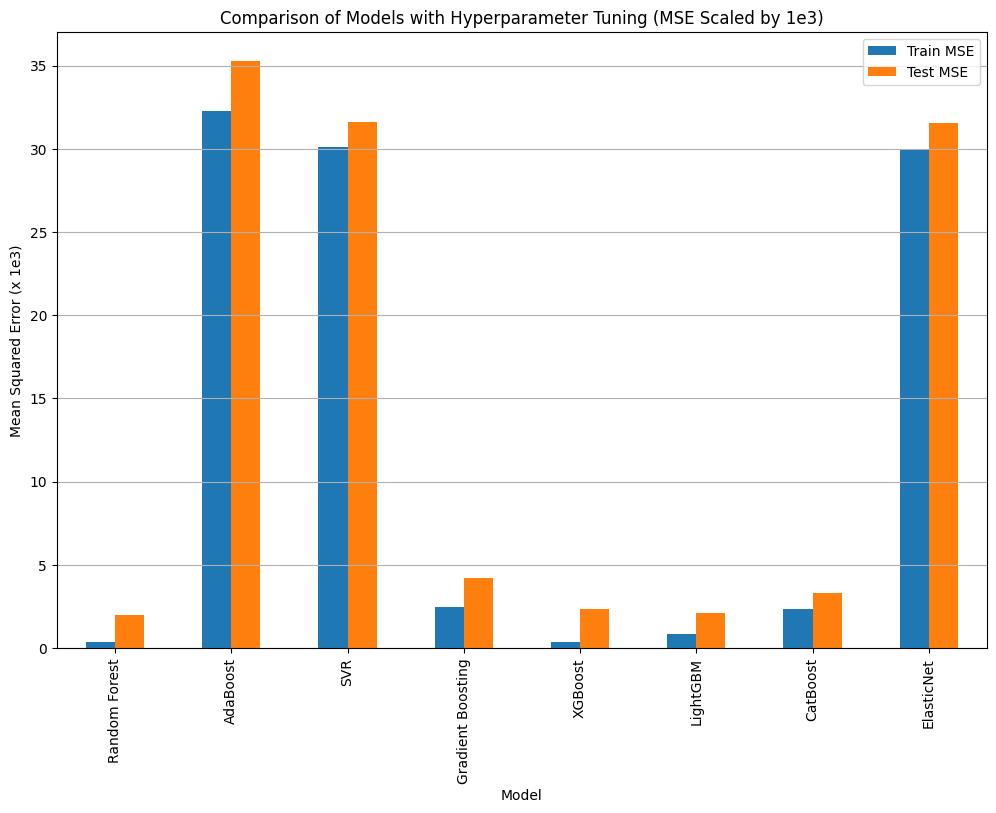

In [47]:
results_df = pd.DataFrame(results)
results_df['Train MSE'] = results_df['Train MSE'] / 1e3
results_df['Test MSE'] = results_df['Test MSE'] / 1e3
print("\n=== Hasil Evaluasi Model (MSE dalam skala kecil) ===")
print(results_df)

results_df.set_index('Model')[['Train MSE', 'Test MSE']].plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Models with Hyperparameter Tuning (MSE Scaled by 1e3)')
plt.ylabel('Mean Squared Error (x 1e3)')
plt.grid(axis='y')
plt.show()


**Insight dari Hasil Evaluasi Model**

**1. Performansi Model Berdasarkan MSE**
- **Random Forest**:
  - **Train MSE:** 0.337
  - **Test MSE:** 1.952
  - Random Forest menunjukkan performa terbaik dengan nilai MSE terendah pada data uji, mengindikasikan bahwa model mampu menangkap pola data dengan baik tanpa overfitting.

- **AdaBoost**:
  - **Train MSE:** 32.244
  - **Test MSE:** 35.258
  - AdaBoost memiliki performa yang jauh lebih buruk dibandingkan model lain. MSE yang tinggi menunjukkan bahwa model kesulitan menangkap pola kompleks dalam data.

- **SVR**:
  - **Train MSE:** 30.100
  - **Test MSE:** 31.615
  - SVR memiliki performa yang buruk dengan MSE yang tinggi, mengindikasikan bahwa model ini kurang cocok untuk dataset ini.

- **Gradient Boosting**:
  - **Train MSE:** 2.455
  - **Test MSE:** 4.214
  - Gradient Boosting menunjukkan performa yang baik, dengan MSE yang cukup rendah. Namun, model ini sedikit lebih kompleks dibandingkan Random Forest.

- **XGBoost**:
  - **Train MSE:** 0.363
  - **Test MSE:** 2.337
  - XGBoost memiliki performa yang sangat baik, mendekati Random Forest, tetapi dengan sedikit peningkatan MSE pada data uji.

- **LightGBM**:
  - **Train MSE:** 0.832
  - **Test MSE:** 2.113
  - LightGBM juga menunjukkan performa yang sangat baik, hanya sedikit di bawah Random Forest.

- **CatBoost**:
  - **Train MSE:** 2.321
  - **Test MSE:** 3.319
  - CatBoost memiliki performa yang baik, tetapi lebih rendah dibandingkan XGBoost dan LightGBM.

- **ElasticNet**:
  - **Train MSE:** 29.995
  - **Test MSE:** 31.559
  - ElasticNet memiliki performa yang buruk, menunjukkan bahwa model linier ini kurang cocok untuk dataset dengan pola non-linear.

---

**2. Overfitting vs Generalisasi**
- **Random Forest dan Gradient Boosting**:
  - Memiliki keseimbangan yang baik antara Train MSE dan Test MSE, menunjukkan bahwa model dapat menggeneralisasi pola dengan baik tanpa overfitting.
- **AdaBoost dan SVR**:
  - Memiliki MSE yang tinggi pada data latih dan uji, menunjukkan underfitting, yaitu model gagal menangkap pola kompleks dalam data.
- **ElasticNet**:
  - MSE yang tinggi mengindikasikan bahwa model linier tidak mampu menangani dataset ini, yang kemungkinan besar memiliki hubungan non-linear antara fitur dan target.

---

**3. Model Terbaik**
- **Random Forest** adalah model terbaik berdasarkan MSE terendah pada data uji (**1.952**), diikuti oleh **LightGBM** (**2.113**) dan **XGBoost** (**2.337**).
- Ketiga model ini cocok untuk digunakan pada dataset dengan pola kompleks karena dapat menangkap hubungan non-linear antara fitur dan target.

---
**4. Kesimpulan**
- **Model Boosting (XGBoost, LightGBM, CatBoost)** menunjukkan performa yang sangat baik dan cocok untuk data dengan pola yang kompleks.
- **Random Forest** adalah pilihan terbaik dalam hal akurasi, sederhana, dan robust terhadap overfitting.
- Model linier seperti **ElasticNet** dan **SVR** kurang cocok untuk dataset ini karena gagal menangkap hubungan non-linear dalam data.
- **AdaBoost** memiliki performa yang buruk karena sensitif terhadap outliers dan data kompleks.
- **Pemilihan model terbaik** harus mempertimbangkan MSE pada data uji, efisiensi komputasi, dan kebutuhan aplikasi.


Model terbaik berdasarkan Test MSE: Random Forest

=== Prediksi dengan Model Terbaik ===
      y_true_nasdaq  y_true_spy  y_pred_nasdaq  y_pred_spy
1574    2459.310059  144.020004    2442.000171  142.197999
2125    1808.060059   91.550003    1820.552405   92.076900
4298    7240.950195  275.450012    7146.415405  266.525001
853     1984.500000  112.870003    1975.917650  112.390646
31      2552.909912  133.339996    2394.394802  129.736652


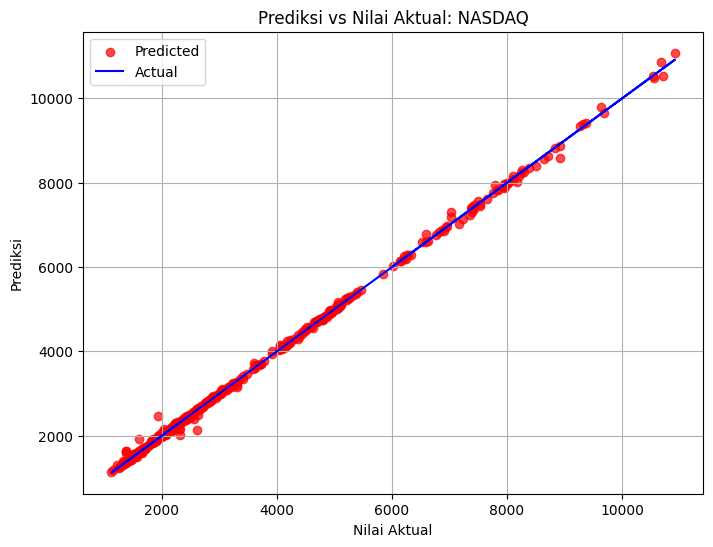

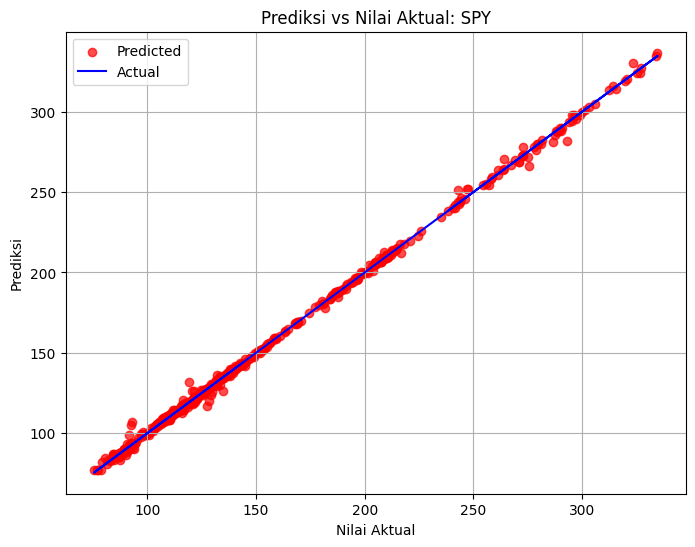

In [48]:
from operator import ifloordiv
# ===========================
# Prediksi Data Uji dengan Model Terbaik
# ===========================

best_model_name = results_df.loc[results_df['Test MSE'].idxmin(), 'Model']
print(f"Model terbaik berdasarkan Test MSE: {best_model_name}")

if best_model_name == 'Random Forest':
    best_model = rf_best
elif best_model_name == 'AdaBoost':
    best_model = boosting_best
elif best_model_name == 'SVR':
    best_model = svr_best
elif best_model_name == 'Gradient Boosting':
    best_model = gb_best
elif best_model_name == 'XGBoost':
    best_model = xgb_best
elif best_model_name == 'LightGBM':
    best_model = lgb_best
elif best_model_name == 'CatBoost':
    best_model = cb_best
elif best_model_name == 'ElasticNet':
    best_model = en_best

y_test_pred = best_model.predict(X_test_scaled)
predictions = pd.DataFrame({
    'y_true_nasdaq': y_test['Close_nasdaq'],
    'y_true_spy': y_test['Close_spy'],
    'y_pred_nasdaq': y_test_pred[:, 0],
    'y_pred_spy': y_test_pred[:, 1]
})

print("\n=== Prediksi dengan Model Terbaik ===")
print(predictions.head())

for target in ['nasdaq', 'spy']:
    plt.figure(figsize=(8, 6))
    plt.scatter(predictions[f'y_true_{target}'], predictions[f'y_pred_{target}'], color='red', alpha=0.7, label='Predicted')
    plt.plot(predictions[f'y_true_{target}'], predictions[f'y_true_{target}'], color='blue', label='Actual')
    plt.title(f'Prediksi vs Nilai Aktual: {target.upper()}')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Prediksi')
    plt.legend()
    plt.grid()
    plt.show()


**Insight dari Prediksi vs Nilai Aktual Menggunakan Model Terbaik (Random Forest)**

**1. Pemilihan Model Terbaik**
- Model terbaik berdasarkan nilai **Test MSE** adalah **Random Forest** dengan Test MSE sebesar **1.952**.
- Hal ini mengindikasikan bahwa Random Forest mampu memprediksi target dengan akurasi yang sangat baik.

---

**2. Visualisasi Prediksi vs Nilai Aktual**
- **Plot NASDAQ:**
  - Titik-titik merah (prediksi) sangat dekat dengan garis biru (nilai aktual), menunjukkan bahwa model berhasil menangkap pola dalam data dengan baik.
  - Sebagian besar prediksi berada sangat dekat dengan nilai aktual, mencerminkan tingkat kesalahan prediksi yang rendah.

- **Plot SPY:**
  - Pola serupa terlihat pada prediksi SPY, dengan distribusi prediksi yang sangat dekat dengan nilai aktual.
  - Hal ini menunjukkan bahwa Random Forest memiliki performa yang konsisten untuk kedua target.

---

**3. Tabel Prediksi vs Nilai Aktual**
- Tabel menunjukkan prediksi untuk beberapa sampel:
  - Contoh:
    - **Baris 1:** Nilai aktual NASDAQ: 2459.31, Prediksi: 2442.00 (selisih hanya sekitar 17 poin).
    - **Baris 3:** Nilai aktual NASDAQ: 7240.95, Prediksi: 7146.42 (selisih sekitar 94 poin).
    - Selisih nilai aktual dan prediksi untuk SPY juga sangat kecil.
  - **Kesimpulan:** Prediksi model sangat dekat dengan nilai aktual, mencerminkan akurasi yang tinggi.

---

**4. Akurasi Model**
- Model **Random Forest** mampu memprediksi kedua target dengan sangat baik, ditunjukkan oleh:
  - Plot yang hampir linier antara prediksi dan nilai aktual.
  - Test MSE yang rendah menunjukkan generalisasi yang baik pada data yang belum pernah dilihat.

---
**5. Kemungkinan Penyempurnaan**
- **Outliers:** Beberapa titik prediksi sedikit menyimpang dari garis ideal (terutama pada nilai yang lebih tinggi). Hal ini dapat diperbaiki dengan:
  - Penghapusan outliers pada data.
  - Hyperparameter tuning lebih lanjut.

- **Feature Engineering:** Meskipun model bekerja dengan sangat baik, menambahkan fitur tambahan (jika relevan) dapat lebih meningkatkan akurasi.

---
**6. Kesimpulan**
- **Random Forest** adalah model terbaik berdasarkan evaluasi MSE dan visualisasi prediksi vs nilai aktual.
- Model ini mampu menangkap pola data yang kompleks dengan baik, menghasilkan prediksi yang sangat dekat dengan nilai aktual untuk kedua target (NASDAQ dan SPY).
- Performa ini menunjukkan bahwa Random Forest adalah pilihan yang solid untuk analisis ini, dengan keseimbangan yang baik antara akurasi dan generalisasi.
